# Solução Proposta - Competição DSA de Machine Learning
# Edição Março/2019

https://www.kaggle.com/c/competicao-dsa-machine-learning-mar-2019

In [1]:
import numpy as np 
import pandas as pd 


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df_store = pd.read_csv('lojas.csv')
df = pd.read_csv('dataset_treino.csv', low_memory=False)
df = df.merge(df_store, on = 'Store')

In [4]:
df_test = pd.read_csv('dataset_teste.csv', low_memory=False)
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### Análise Exploratória

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df.Date.apply(lambda dt: dt.month)
df['Year'] = df.Date.apply(lambda dt: dt.year)
df['WeekOfYear'] = df.Date.apply(lambda dt: dt.weekofyear)
df['Day'] = df.Date.apply(lambda dt: dt.day)

df['isMonthEnd'] = df.Date.apply(lambda dt: dt.is_month_end)
df['isMonthStart'] = df.Date.apply(lambda dt: dt.is_month_start)
df['isQuarterEnd'] = df.Date.apply(lambda dt: dt.is_quarter_end )
df['isQuarterStart'] = df.Date.apply(lambda dt: dt.is_quarter_start)
df['isYearEnd'] = df.Date.apply(lambda dt: dt.is_year_end)
df['isYearStart'] = df.Date.apply(lambda dt: dt.is_year_start)

In [7]:
features = []
for feat in df.columns.drop('Sales'):
    if df[feat].dtype == np.float64 or df[feat].dtype == np.int64:
        features.append(feat)

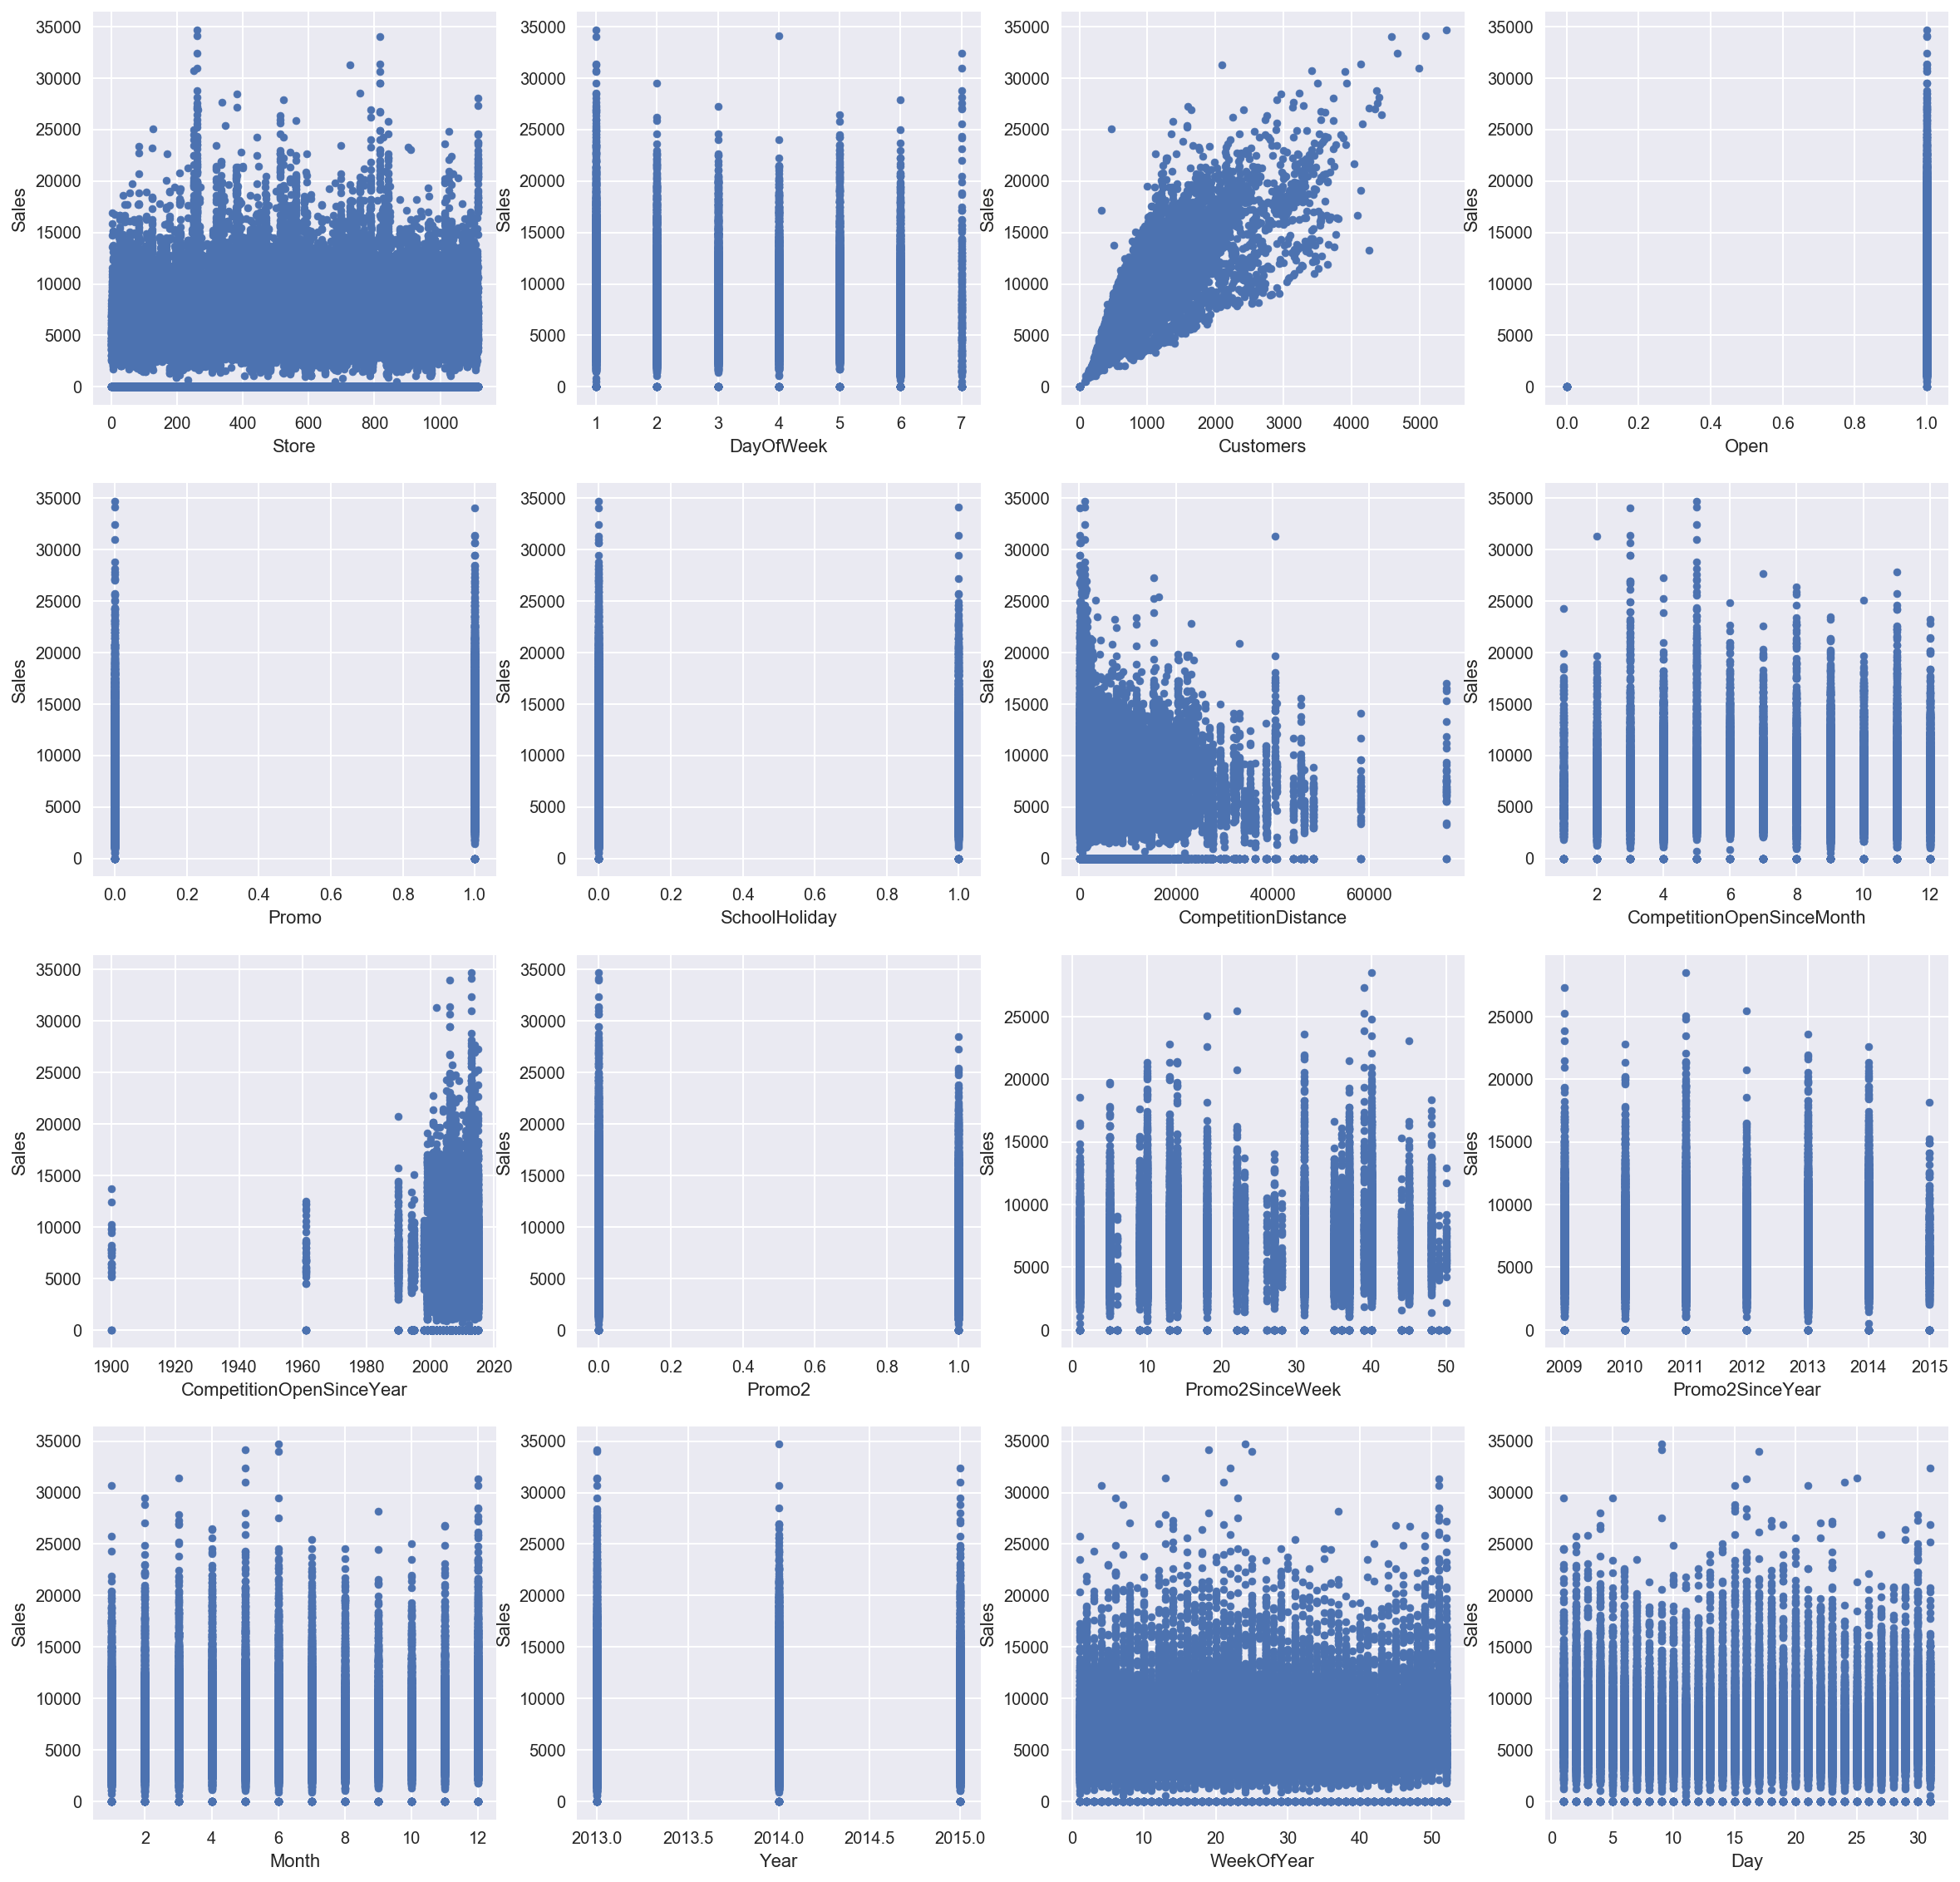

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20));
df_sample = df.sample(frac=0.05)

for idx, feature in enumerate(features):
    df_sample.plot(feature, "Sales", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4]);

In [9]:
import gc 

del df_sample
gc.collect()

246

In [10]:
df[df.columns.drop('Sales')].corrwith(df.Sales)

Store                        0.005126
DayOfWeek                   -0.462125
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
CompetitionDistance         -0.019229
CompetitionOpenSinceMonth   -0.028257
CompetitionOpenSinceYear     0.012659
Promo2                      -0.091040
Promo2SinceWeek              0.059558
Promo2SinceYear             -0.021127
Month                        0.048768
Year                         0.023519
WeekOfYear                   0.052946
Day                         -0.011612
isMonthEnd                   0.047112
isMonthStart                -0.053450
isQuarterEnd                 0.027899
isQuarterStart              -0.013222
isYearEnd                   -0.019392
isYearStart                 -0.084589
dtype: float64

In [11]:
df.groupby('StoreType')['Sales'].mean()

StoreType
a     5738.179710
b    10058.837334
c     5723.629246
d     5641.819243
Name: Sales, dtype: float64

C:\Users\LuizFPanza\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\LuizFPanza\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


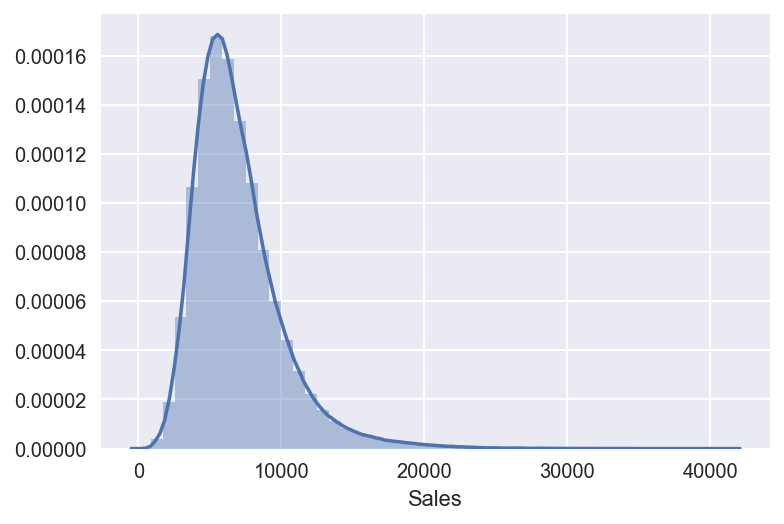

In [12]:
sns.distplot(df.Sales[df.Sales > 0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 28 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null datetime64[ns]
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 no

In [14]:
df[(pd.isnull(df.Promo2SinceWeek) | pd.isnull(df.Promo2SinceYear)) & df.Promo2 != 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Month,Year,WeekOfYear,Day,isMonthEnd,isMonthStart,isQuarterEnd,isQuarterStart,isYearEnd,isYearStart


### Tratamento de Valores Missing

In [15]:
df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df['CompetitionOpenSinceYear'].fillna(0, inplace=True)

In [16]:
df['Promo2SinceWeek'].fillna(0, inplace=True)
df['Promo2SinceYear'].fillna(0, inplace=True)

In [17]:
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
df['CompetitionDistance'] = np.log(df.CompetitionDistance) + 1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020800D7DA20>],
      dtype=object)

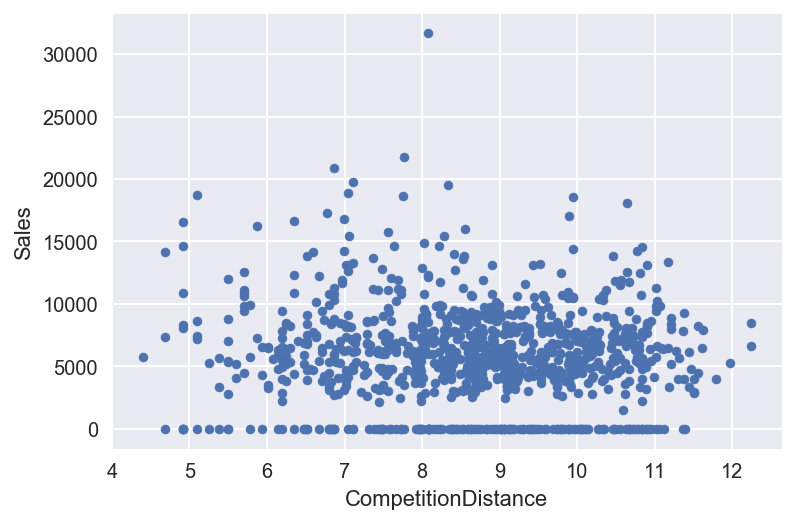

In [18]:
df.sample(frac=.001).plot('CompetitionDistance', "Sales", subplots=True, kind="scatter")

### Outros Tratamentos e Limpezas

In [19]:
df.groupby('Store')['CompetitionDistance'].unique().apply(lambda l: 1 if len(l) > 1 else 0).sum()

0

In [20]:
df['StateHoliday'] = df['StateHoliday'].replace(0, '0')
df['Holiday'] = df.StateHoliday.apply(lambda x: 0 if x == '0' else 1)

df.drop('StateHoliday', axis=1, inplace=True)

In [21]:
df = df.sort_values(by='Date')
df.drop('Date', axis=1, inplace=True)

In [22]:
df = df[(df['Open'] != 0) & (df['Sales'] != 0)]
df.drop('Open', axis=1, inplace=True)

In [23]:
df.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     242397
Feb,May,Aug,Nov      97998
Mar,Jun,Sept,Dec     80651
Name: PromoInterval, dtype: int64

In [24]:
df['isMonthEnd'] = df['isMonthEnd'].astype(int)
df['isMonthStart'] = df['isMonthStart'].astype(int)
df['isQuarterEnd'] = df['isQuarterEnd'].astype(int)
df['isQuarterStart'] = df['isQuarterStart'].astype(int)
df['isYearEnd'] = df['isYearEnd'].astype(int)
df['isYearStart'] = df['isYearStart'].astype(int)

In [25]:
df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + \
        (df.Month - df.CompetitionOpenSinceMonth)
    
# Promo open time
df['PromoOpen'] = 12 * (df.Year - df.Promo2SinceYear) + \
        (df.WeekOfYear - df.Promo2SinceWeek) / 4.0

df = pd.get_dummies(df, columns=['DayOfWeek', 'StoreType', 'Assortment','PromoInterval'], dummy_na=True)

### Calculando a Métrica

In [26]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score, make_scorer

def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w


def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe


def rmspe_xg(yhat, y):
    # y = y.values
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

### Modelagem Preditiva

In [27]:
!pip install xgboost==0.80

In [28]:
!pip install hyperopt

In [29]:
import xgboost as xgb
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


def train(index, train, hp_selection=False):
    train_store = train[index]
    X = train_store[train_store.columns.drop(['Sales', 'Store', 'Customers'])]
    y = train_store['Sales']

    train_size = int(X.shape[0]*.99)
    print(f'Regressor for {index} store\nTraining on {X.shape[0]} samples')
    X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
    X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]

    xtrain = xgb.DMatrix(X_train, np.log(y_train.values) + 1)
    xtest = xgb.DMatrix(X_test, np.log(y_test.values) + 1)
    
    if hp_selection:
        def score(params):
            num_round = 200
            model = xgb.train(params, xtrain, num_round, feval=rmspe_xg)
            predictions = model.predict(xtest)
            score = rmspe(y=y_test, yhat=predictions)
            return {'loss': score, 'status': STATUS_OK}
        
        def optimize(trials):
            space = {
                     'n_estimators' : hp.quniform('n_estimators', 1, 1000, 1),
                     'eta' : hp.quniform('eta', 0.2, 0.825, 0.025),
                     'max_depth' : hp.choice('max_depth', np.arange(1, 14, dtype=int)),
                     'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
                     'subsample' : hp.quniform('subsample', 0.7, 1, 0.05),
                     'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
                     'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
                     'eval_metric': 'rmse',
                     'objective': 'reg:linear',
                     'nthread': 4,
                     'silent' : 1
                     }

            best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=250)
            return best
        
        trials = Trials()
        best_opts = optimize(trials)
        best_opts['silent'] = 1
    else:
        best_opts = {'colsample_bytree': 0.7, 
                  'eta': 0.625, 
                  'gamma': 0.8, 
                  'max_depth': 6,
                  'eval_metric': 'rmse',
                  'min_child_weight': 6.0, 
                  'n_estimators': 8.0,  # 585
                  'silent': 1,
                  'nthread': 4,
                  'subsample': 0.95}
        
    watchlist = [(xtrain, 'train'), (xtest, 'eval')]
    num_round = 10000
    regressor = xgb.train(best_opts, xtrain, num_round, watchlist, feval=rmspe_xg,
                          verbose_eval=10, early_stopping_rounds=50)
    print("Validating")
    train_probs = regressor.predict(xtest)
    indices = train_probs < 0
    train_probs[indices] = 0
    error = rmspe(np.exp(train_probs) - 1, y_test.values)
    print('error', error)
    regressor = xgb.train(best_opts, xtest, 10, feval=rmspe_xg, xgb_model=regressor)
    return regressor

In [30]:
df_test = pd.read_csv('dataset_teste.csv', low_memory=False)
closed_store_ids = df_test["Id"][df_test["Open"] == 0].values

df_test = df_test.merge(df_store, on='Store')
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Month'] = df_test.Date.apply(lambda dt: dt.month)
df_test['Year'] = df_test.Date.apply(lambda dt: dt.year)
df_test['WeekOfYear'] = df_test.Date.apply(lambda dt: dt.weekofyear)
df_test['Day'] = df_test.Date.apply(lambda dt: dt.day)

df_test['isMonthEnd'] = df_test.Date.apply(lambda dt: dt.is_month_end).astype(int)
df_test['isMonthStart'] = df_test.Date.apply(lambda dt: dt.is_month_start).astype(int)
df_test['isQuarterEnd'] = df_test.Date.apply(lambda dt: dt.is_quarter_end ).astype(int)
df_test['isQuarterStart'] = df_test.Date.apply(lambda dt: dt.is_quarter_start).astype(int)
df_test['isYearEnd'] = df_test.Date.apply(lambda dt: dt.is_year_end).astype(int)
df_test['isYearStart'] = df_test.Date.apply(lambda dt: dt.is_year_start).astype(int)

df_test['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df_test['CompetitionOpenSinceYear'].fillna(0, inplace=True)

df_test['Promo2SinceWeek'].fillna(0, inplace=True)
df_test['Promo2SinceYear'].fillna(0, inplace=True)

df_test['CompetitionDistance'].fillna(df_test['CompetitionDistance'].median(), inplace=True)

df_test['StateHoliday'] = df_test['StateHoliday'].replace(0, '0')
df_test['Holiday'] = df_test.StateHoliday.apply(lambda x: 0 if x == '0' else 1)

df_test.drop('StateHoliday', axis=1, inplace=True)
df_test.drop('Date', axis=1, inplace=True)

# competition open time (in months)
df_test['CompetitionOpen'] = 12 * (df_test.Year - df_test.CompetitionOpenSinceYear) + \
        (df_test.Month - df_test.CompetitionOpenSinceMonth)
    
# Promo open time
df_test['PromoOpen'] = 12 * (df_test.Year - df_test.Promo2SinceYear) + \
        (df_test.WeekOfYear - df_test.Promo2SinceWeek) / 4.0

df_test.drop(['Open'], axis=1, inplace=True)

df_test = pd.get_dummies(df_test, columns=['DayOfWeek', 'StoreType', 'Assortment','PromoInterval'], dummy_na=True)

In [31]:
store_grouped = dict(list(df.groupby('Store')))
test_grouped = dict(list(df_test.groupby('Store')))

In [32]:
submission = pd.Series(np.zeros(df_test.Id.shape))
submission.index += 1

for store in test_grouped:
    test = test_grouped[store].copy()
    ids = test['Id']
    dpred = xgb.DMatrix(test[test.columns.drop(['Id', 'Store'])]) 
    regressor = train(store, store_grouped)
    preds = regressor.predict(dpred)
    preds[preds < 0] = 0
    preds = np.exp(preds) - 1
    submission[ids] = preds

submission[closed_store_ids] = 0

Regressor for 1 store
Training on 781 samples
[0]	train-rmse:3.36977	eval-rmse:3.37475	train-rmspe:0.964767	eval-rmspe:0.965303
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.130815	eval-rmse:0.093229	train-rmspe:0.134723	eval-rmspe:0.088829
[20]	train-rmse:0.130815	eval-rmse:0.093318	train-rmspe:0.134852	eval-rmspe:0.089011
[30]	train-rmse:0.130818	eval-rmse:0.093151	train-rmspe:0.134606	eval-rmspe:0.088666
[40]	train-rmse:0.130817	eval-rmse:0.093388	train-rmspe:0.134954	eval-rmspe:0.089153
[50]	train-rmse:0.130824	eval-rmse:0.093077	train-rmspe:0.134491	eval-rmspe:0.088504
Stopping. Best iteration:
[5]	train-rmse:0.133289	eval-rmse:0.093305	train-rmspe:0.132191	eval-rmspe:0.085556

Validating
error 1.7781490525948063
Regressor for 3 store
Training on 779 samples
[0]	train-rmse:3.50481	eval-rmse:3.53173	train-rmspe:0.968049	eval-rmspe:0.969163
Multiple eval metrics have 

[90]	train-rmse:0.149428	eval-rmse:0.133843	train-rmspe:0.146753	eval-rmspe:0.125635
[100]	train-rmse:0.149433	eval-rmse:0.132834	train-rmspe:0.147213	eval-rmspe:0.124958
Stopping. Best iteration:
[51]	train-rmse:0.152769	eval-rmse:0.130852	train-rmspe:0.149563	eval-rmspe:0.123659

Validating
error 1.5911806428550688
Regressor for 14 store
Training on 779 samples
[0]	train-rmse:3.41952	eval-rmse:3.37654	train-rmspe:0.965753	eval-rmspe:0.964387
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.122839	eval-rmse:0.115761	train-rmspe:0.122266	eval-rmspe:0.125019
[20]	train-rmse:0.122834	eval-rmse:0.116585	train-rmspe:0.122434	eval-rmspe:0.125955
[30]	train-rmse:0.122834	eval-rmse:0.116931	train-rmspe:0.122506	eval-rmspe:0.126346
[40]	train-rmse:0.122834	eval-rmse:0.116635	train-rmspe:0.122444	eval-rmspe:0.126012
[50]	train-rmse:0.122835	eval-rmse:0.116287	train-rmspe:0.122372	ev

Stopping. Best iteration:
[43]	train-rmse:0.146882	eval-rmse:0.153655	train-rmspe:0.147979	eval-rmspe:0.138623

Validating
error 1.4159473118620542
Regressor for 22 store
Training on 619 samples
[0]	train-rmse:3.35188	eval-rmse:3.58109	train-rmspe:0.963756	eval-rmspe:0.971429
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.137033	eval-rmse:0.164201	train-rmspe:0.133841	eval-rmspe:0.148139
[20]	train-rmse:0.13703	eval-rmse:0.163734	train-rmspe:0.133945	eval-rmspe:0.147744
[30]	train-rmse:0.137032	eval-rmse:0.164071	train-rmspe:0.133869	eval-rmspe:0.148029
[40]	train-rmse:0.137032	eval-rmse:0.162777	train-rmspe:0.134166	eval-rmspe:0.146935
[50]	train-rmse:0.137033	eval-rmse:0.164256	train-rmspe:0.133828	eval-rmspe:0.148185
[60]	train-rmse:0.137031	eval-rmse:0.163881	train-rmspe:0.133912	eval-rmspe:0.147868
[70]	train-rmse:0.137031	eval-rmse:0.164002	train-rmspe:0.133885	eval

[60]	train-rmse:0.129741	eval-rmse:0.087919	train-rmspe:0.134657	eval-rmspe:0.082607
[70]	train-rmse:0.12974	eval-rmse:0.088381	train-rmspe:0.134537	eval-rmspe:0.083021
[80]	train-rmse:0.129745	eval-rmse:0.087317	train-rmspe:0.134819	eval-rmspe:0.082067
[90]	train-rmse:0.12974	eval-rmse:0.088005	train-rmspe:0.134635	eval-rmspe:0.082684
Stopping. Best iteration:
[43]	train-rmse:0.129765	eval-rmse:0.086287	train-rmspe:0.135109	eval-rmspe:0.081144

Validating
error 1.5485810083049107
Regressor for 33 store
Training on 779 samples
[0]	train-rmse:3.58295	eval-rmse:3.53475	train-rmspe:0.971514	eval-rmspe:0.970286
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.143411	eval-rmse:0.135211	train-rmspe:0.159702	eval-rmspe:0.148854
[20]	train-rmse:0.143413	eval-rmse:0.134882	train-rmspe:0.159592	eval-rmspe:0.148451
[30]	train-rmse:0.143414	eval-rmse:0.135807	train-rmspe:0.159905	eval-

[30]	train-rmse:0.122038	eval-rmse:0.15734	train-rmspe:0.120427	eval-rmspe:0.180181
[40]	train-rmse:0.122037	eval-rmse:0.157683	train-rmspe:0.120506	eval-rmspe:0.180592
[50]	train-rmse:0.122038	eval-rmse:0.15721	train-rmspe:0.120397	eval-rmspe:0.180025
Stopping. Best iteration:
[4]	train-rmse:0.147878	eval-rmse:0.117	train-rmspe:0.13324	eval-rmspe:0.130384

Validating
error 2.1129753400268094
Regressor for 43 store
Training on 779 samples
[0]	train-rmse:3.4997	eval-rmse:3.44734	train-rmspe:0.968266	eval-rmspe:0.966916
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.154912	eval-rmse:0.125087	train-rmspe:0.192698	eval-rmspe:0.137786
[20]	train-rmse:0.151897	eval-rmse:0.122806	train-rmspe:0.191073	eval-rmspe:0.135088
[30]	train-rmse:0.151896	eval-rmse:0.123054	train-rmspe:0.191163	eval-rmspe:0.135382
[40]	train-rmse:0.144066	eval-rmse:0.120915	train-rmspe:0.177032	eval-rmspe:

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.136396	eval-rmse:0.099303	train-rmspe:0.13431	eval-rmspe:0.101168
[20]	train-rmse:0.136396	eval-rmse:0.099271	train-rmspe:0.134335	eval-rmspe:0.101157
[30]	train-rmse:0.136405	eval-rmse:0.099603	train-rmspe:0.134076	eval-rmspe:0.101283
[40]	train-rmse:0.136397	eval-rmse:0.099086	train-rmspe:0.134493	eval-rmspe:0.101091
[50]	train-rmse:0.136396	eval-rmse:0.099176	train-rmspe:0.134415	eval-rmspe:0.101123
[60]	train-rmse:0.136406	eval-rmse:0.098815	train-rmspe:0.13474	eval-rmspe:0.101002
[70]	train-rmse:0.136396	eval-rmse:0.099293	train-rmspe:0.134318	eval-rmspe:0.101165
[80]	train-rmse:0.136396	eval-rmse:0.099157	train-rmspe:0.134431	eval-rmspe:0.101116
[90]	train-rmse:0.136397	eval-rmse:0.099054	train-rmspe:0.134521	eval-rmspe:0.10108
[100]	train-rmse:0.136397	eval-rmse:0.099075	train-rmspe:0.134502	eval-rmspe:0.101087
Stopping. Best iteration:
[59]	train-rmse:0.136415	eval-rmse:0.098682	train-rmspe:0.134869	eva

[30]	train-rmse:0.140585	eval-rmse:0.137908	train-rmspe:0.140502	eval-rmspe:0.124524
[40]	train-rmse:0.140604	eval-rmse:0.136977	train-rmspe:0.140997	eval-rmspe:0.123937
[50]	train-rmse:0.140585	eval-rmse:0.137982	train-rmspe:0.140465	eval-rmspe:0.124572
[60]	train-rmse:0.140585	eval-rmse:0.137913	train-rmspe:0.1405	eval-rmspe:0.124527
[70]	train-rmse:0.140592	eval-rmse:0.13732	train-rmspe:0.140809	eval-rmspe:0.124151
[80]	train-rmse:0.140589	eval-rmse:0.138356	train-rmspe:0.140283	eval-rmspe:0.124811
[90]	train-rmse:0.140589	eval-rmse:0.138328	train-rmspe:0.140296	eval-rmspe:0.124793
Stopping. Best iteration:
[40]	train-rmse:0.140604	eval-rmse:0.136977	train-rmspe:0.140997	eval-rmspe:0.123937

Validating
error 1.6135344477178104
Regressor for 64 store
Training on 779 samples
[0]	train-rmse:3.6577	eval-rmse:3.78826	train-rmspe:0.973253	eval-rmspe:0.976891
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved i

[40]	train-rmse:0.136184	eval-rmse:0.102169	train-rmspe:0.133493	eval-rmspe:0.102315
[50]	train-rmse:0.136182	eval-rmse:0.102211	train-rmspe:0.133569	eval-rmspe:0.102416
[60]	train-rmse:0.136182	eval-rmse:0.10233	train-rmspe:0.133778	eval-rmspe:0.102695
Stopping. Best iteration:
[14]	train-rmse:0.136191	eval-rmse:0.102098	train-rmspe:0.133361	eval-rmspe:0.102139

Validating
error 1.7882588701688915
Regressor for 73 store
Training on 784 samples
[0]	train-rmse:3.35553	eval-rmse:3.39015	train-rmspe:0.962826	eval-rmspe:0.964727
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.131446	eval-rmse:0.083772	train-rmspe:0.134371	eval-rmspe:0.085857
[20]	train-rmse:0.131451	eval-rmse:0.084069	train-rmspe:0.134498	eval-rmspe:0.086225
[30]	train-rmse:0.131445	eval-rmse:0.083255	train-rmspe:0.134154	eval-rmspe:0.085215
[40]	train-rmse:0.131447	eval-rmse:0.08382	train-rmspe:0.134391	eval-

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.127011	eval-rmse:0.170216	train-rmspe:0.127232	eval-rmspe:0.153563
[20]	train-rmse:0.127008	eval-rmse:0.169626	train-rmspe:0.127354	eval-rmspe:0.153066
[30]	train-rmse:0.127014	eval-rmse:0.170657	train-rmspe:0.127143	eval-rmspe:0.153934
[40]	train-rmse:0.127008	eval-rmse:0.169501	train-rmspe:0.12738	eval-rmspe:0.152961
[50]	train-rmse:0.127015	eval-rmse:0.168408	train-rmspe:0.127617	eval-rmspe:0.152039
[60]	train-rmse:0.127014	eval-rmse:0.168483	train-rmspe:0.1276	eval-rmspe:0.152103
[70]	train-rmse:0.12701	eval-rmse:0.168906	train-rmspe:0.127508	eval-rmspe:0.15246
[80]	train-rmse:0.127009	eval-rmse:0.169784	train-rmspe:0.127321	eval-rmspe:0.153199
[90]	train-rmse:0.127009	eval-rmse:0.169322	train-rmspe:0.127418	eval-rmspe:0.15281
Stopping. Best iteration:
[42]	train-rmse:0.127025	eval-rmse:0.167668	train-rmspe:0.127784	eval-rmspe:0.151416

Validating
error 1.349025478183971
Regressor for 82 store
Training on 7

[50]	train-rmse:0.143795	eval-rmse:0.140199	train-rmspe:0.151447	eval-rmspe:0.152466
Stopping. Best iteration:
[4]	train-rmse:0.182259	eval-rmse:0.124449	train-rmspe:0.169618	eval-rmspe:0.121679

Validating
error 2.0176005794579637
Regressor for 93 store
Training on 779 samples
[0]	train-rmse:3.44723	eval-rmse:3.41253	train-rmspe:0.965657	eval-rmspe:0.965036
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.139682	eval-rmse:0.154426	train-rmspe:0.150784	eval-rmspe:0.171062
[20]	train-rmse:0.139678	eval-rmse:0.154992	train-rmspe:0.150932	eval-rmspe:0.171744
[30]	train-rmse:0.139682	eval-rmse:0.154446	train-rmspe:0.150789	eval-rmspe:0.171086
[40]	train-rmse:0.139678	eval-rmse:0.155218	train-rmspe:0.150992	eval-rmspe:0.172017
[50]	train-rmse:0.139679	eval-rmse:0.154906	train-rmspe:0.150909	eval-rmspe:0.17164
Stopping. Best iteration:
[4]	train-rmse:0.167951	eval-rmse:0.091614	t

[0]	train-rmse:3.33906	eval-rmse:3.63149	train-rmspe:0.961062	eval-rmspe:0.972433
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.131781	eval-rmse:0.100805	train-rmspe:0.131826	eval-rmspe:0.096141
[20]	train-rmse:0.13178	eval-rmse:0.100645	train-rmspe:0.131876	eval-rmspe:0.096011
[30]	train-rmse:0.131788	eval-rmse:0.101499	train-rmspe:0.131614	eval-rmspe:0.096704
[40]	train-rmse:0.131783	eval-rmse:0.100063	train-rmspe:0.132066	eval-rmspe:0.095541
[50]	train-rmse:0.13178	eval-rmse:0.100686	train-rmspe:0.131863	eval-rmspe:0.096045
[60]	train-rmse:0.13178	eval-rmse:0.100381	train-rmspe:0.131961	eval-rmspe:0.095798
[70]	train-rmse:0.131784	eval-rmse:0.101181	train-rmspe:0.13171	eval-rmspe:0.096446
[80]	train-rmse:0.13178	eval-rmse:0.100752	train-rmspe:0.131843	eval-rmspe:0.096098
[90]	train-rmse:0.131782	eval-rmse:0.100126	train-rmspe:0.132045	eval-rmspe:0.095592
[100]	train-r

[40]	train-rmse:0.139578	eval-rmse:0.140617	train-rmspe:0.138604	eval-rmspe:0.12538
[50]	train-rmse:0.139571	eval-rmse:0.140937	train-rmspe:0.138451	eval-rmspe:0.125599
[60]	train-rmse:0.139572	eval-rmse:0.140888	train-rmspe:0.138474	eval-rmspe:0.125566
[70]	train-rmse:0.13957	eval-rmse:0.141017	train-rmspe:0.138414	eval-rmspe:0.125653
[80]	train-rmse:0.139569	eval-rmse:0.141654	train-rmspe:0.138125	eval-rmspe:0.126093
Stopping. Best iteration:
[36]	train-rmse:0.139579	eval-rmse:0.140577	train-rmspe:0.138624	eval-rmspe:0.125353

Validating
error 1.5956536662079108
Regressor for 115 store
Training on 622 samples
[0]	train-rmse:3.53461	eval-rmse:3.78502	train-rmspe:0.969922	eval-rmspe:0.977169
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.133237	eval-rmse:0.136371	train-rmspe:0.13197	eval-rmspe:0.125797
[20]	train-rmse:0.133234	eval-rmse:0.135602	train-rmspe:0.132132	eval-

[40]	train-rmse:0.222398	eval-rmse:0.16083	train-rmspe:0.26134	eval-rmspe:0.177875
[50]	train-rmse:0.222399	eval-rmse:0.161	train-rmspe:0.26145	eval-rmspe:0.178106
[60]	train-rmse:0.222399	eval-rmse:0.160987	train-rmspe:0.261442	eval-rmspe:0.178089
[70]	train-rmse:0.222398	eval-rmse:0.160805	train-rmspe:0.261324	eval-rmspe:0.177841
Stopping. Best iteration:
[29]	train-rmse:0.225992	eval-rmse:0.155523	train-rmspe:0.26458	eval-rmspe:0.170576

Validating
error 2.0327523126165734
Regressor for 127 store
Training on 623 samples
[0]	train-rmse:3.40506	eval-rmse:3.64915	train-rmspe:0.96523	eval-rmspe:0.972896
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.131269	eval-rmse:0.12722	train-rmspe:0.129162	eval-rmspe:0.117382
[20]	train-rmse:0.131266	eval-rmse:0.125761	train-rmspe:0.129551	eval-rmspe:0.116167
[30]	train-rmse:0.131264	eval-rmse:0.126057	train-rmspe:0.129469	eval-rmspe:

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.149206	eval-rmse:0.176153	train-rmspe:0.151697	eval-rmspe:0.157459
[20]	train-rmse:0.149204	eval-rmse:0.175814	train-rmspe:0.151822	eval-rmspe:0.15722
[30]	train-rmse:0.149208	eval-rmse:0.176365	train-rmspe:0.15162	eval-rmspe:0.157609
[40]	train-rmse:0.149205	eval-rmse:0.175438	train-rmspe:0.151964	eval-rmspe:0.156955
[50]	train-rmse:0.14612	eval-rmse:0.177669	train-rmspe:0.151404	eval-rmspe:0.158535
[60]	train-rmse:0.146131	eval-rmse:0.17647	train-rmspe:0.151853	eval-rmspe:0.157684
[70]	train-rmse:0.146122	eval-rmse:0.177072	train-rmspe:0.151624	eval-rmspe:0.15811
[80]	train-rmse:0.14612	eval-rmse:0.177405	train-rmspe:0.1515	eval-rmspe:0.158347
[90]	train-rmse:0.14612	eval-rmse:0.177611	train-rmspe:0.151425	eval-rmspe:0.158494
Stopping. Best iteration:
[41]	train-rmse:0.149214	eval-rmse:0.174713	train-rmspe:0.152247	eval-rmspe:0.156445

Validating
error 1.5040803329208678
Regressor for 137 store
Training on 62

[0]	train-rmse:3.55292	eval-rmse:3.66576	train-rmspe:0.970362	eval-rmspe:0.973778
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.170089	eval-rmse:0.149923	train-rmspe:0.212076	eval-rmspe:0.143874
[20]	train-rmse:0.170089	eval-rmse:0.149974	train-rmspe:0.212045	eval-rmspe:0.143905
[30]	train-rmse:0.170088	eval-rmse:0.150392	train-rmspe:0.2118	eval-rmspe:0.144152
[40]	train-rmse:0.170089	eval-rmse:0.149947	train-rmspe:0.212061	eval-rmspe:0.143889
[50]	train-rmse:0.157987	eval-rmse:0.135573	train-rmspe:0.186605	eval-rmspe:0.132335
[60]	train-rmse:0.157985	eval-rmse:0.135018	train-rmspe:0.186974	eval-rmspe:0.132052
[70]	train-rmse:0.146066	eval-rmse:0.123742	train-rmspe:0.169677	eval-rmspe:0.121333
[80]	train-rmse:0.146066	eval-rmse:0.1237	train-rmspe:0.169703	eval-rmspe:0.12131
[90]	train-rmse:0.146074	eval-rmse:0.123279	train-rmspe:0.169976	eval-rmspe:0.121086
[100]	train-r

Validating
error 2.2537265101915116
Regressor for 154 store
Training on 781 samples
[0]	train-rmse:3.59574	eval-rmse:3.70447	train-rmspe:0.971603	eval-rmspe:0.974916
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.147151	eval-rmse:0.089128	train-rmspe:0.150473	eval-rmspe:0.085863
[20]	train-rmse:0.147151	eval-rmse:0.088021	train-rmspe:0.150908	eval-rmspe:0.08497
[30]	train-rmse:0.135014	eval-rmse:0.107916	train-rmspe:0.140179	eval-rmspe:0.1043
[40]	train-rmse:0.135013	eval-rmse:0.107853	train-rmspe:0.140203	eval-rmspe:0.104253
[50]	train-rmse:0.135017	eval-rmse:0.108246	train-rmspe:0.140054	eval-rmspe:0.104542
[60]	train-rmse:0.135013	eval-rmse:0.107618	train-rmspe:0.140294	eval-rmspe:0.104081
[70]	train-rmse:0.135014	eval-rmse:0.107321	train-rmspe:0.140413	eval-rmspe:0.103864
Stopping. Best iteration:
[21]	train-rmse:0.147153	eval-rmse:0.08787	train-rmspe:0.150971	eval-rm

Stopping. Best iteration:
[70]	train-rmse:0.141059	eval-rmse:0.121836	train-rmspe:0.14406	eval-rmspe:0.111217

Validating
error 1.5775044370521567
Regressor for 164 store
Training on 623 samples
[0]	train-rmse:3.46661	eval-rmse:3.6943	train-rmspe:0.967018	eval-rmspe:0.973801
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.138841	eval-rmse:0.101205	train-rmspe:0.137409	eval-rmspe:0.094941
[20]	train-rmse:0.138841	eval-rmse:0.100377	train-rmspe:0.137653	eval-rmspe:0.094231
[30]	train-rmse:0.138842	eval-rmse:0.10026	train-rmspe:0.137689	eval-rmspe:0.094132
[40]	train-rmse:0.138848	eval-rmse:0.101867	train-rmspe:0.137222	eval-rmspe:0.095509
[50]	train-rmse:0.13884	eval-rmse:0.100696	train-rmspe:0.137558	eval-rmspe:0.094505
[60]	train-rmse:0.138841	eval-rmse:0.101168	train-rmspe:0.137419	eval-rmspe:0.094909
[70]	train-rmse:0.138844	eval-rmse:0.101528	train-rmspe:0.137317	eval-r

Validating
error 2.0387141786469196
Regressor for 172 store
Training on 622 samples
[0]	train-rmse:3.51522	eval-rmse:3.59883	train-rmspe:0.969709	eval-rmspe:0.972615
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.122915	eval-rmse:0.076567	train-rmspe:0.122928	eval-rmspe:0.073372
[20]	train-rmse:0.122905	eval-rmse:0.074361	train-rmspe:0.12335	eval-rmspe:0.071332
[30]	train-rmse:0.122905	eval-rmse:0.075582	train-rmspe:0.12311	eval-rmspe:0.072462
[40]	train-rmse:0.122904	eval-rmse:0.0752	train-rmspe:0.123184	eval-rmspe:0.072108
[50]	train-rmse:0.12291	eval-rmse:0.073799	train-rmspe:0.123465	eval-rmspe:0.07081
[60]	train-rmse:0.122904	eval-rmse:0.074743	train-rmspe:0.123273	eval-rmspe:0.071686
[70]	train-rmse:0.122904	eval-rmse:0.074536	train-rmspe:0.123315	eval-rmspe:0.071493
[80]	train-rmse:0.122907	eval-rmse:0.075867	train-rmspe:0.123057	eval-rmspe:0.072725
[90]	train-rmse

[100]	train-rmse:0.147143	eval-rmse:0.140022	train-rmspe:0.156613	eval-rmspe:0.126855
[110]	train-rmse:0.147147	eval-rmse:0.14044	train-rmspe:0.156386	eval-rmspe:0.127115
[120]	train-rmse:0.147144	eval-rmse:0.140205	train-rmspe:0.156512	eval-rmspe:0.126968
[130]	train-rmse:0.147165	eval-rmse:0.141064	train-rmspe:0.156065	eval-rmspe:0.127507
Stopping. Best iteration:
[83]	train-rmse:0.147158	eval-rmse:0.139149	train-rmspe:0.157121	eval-rmspe:0.126323

Validating
error 1.6170818862580358
Regressor for 183 store
Training on 611 samples
[0]	train-rmse:3.3717	eval-rmse:3.52437	train-rmspe:0.963593	eval-rmspe:0.969581
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.161535	eval-rmse:0.096677	train-rmspe:0.200735	eval-rmspe:0.100178
[20]	train-rmse:0.161535	eval-rmse:0.096685	train-rmspe:0.200741	eval-rmspe:0.10019
[30]	train-rmse:0.16154	eval-rmse:0.097055	train-rmspe:0.201011	ev

[70]	train-rmse:0.124618	eval-rmse:0.134724	train-rmspe:0.126682	eval-rmspe:0.123097
[80]	train-rmse:0.124622	eval-rmse:0.135249	train-rmspe:0.126559	eval-rmspe:0.123543
[90]	train-rmse:0.124618	eval-rmse:0.134488	train-rmspe:0.126739	eval-rmspe:0.122898
Stopping. Best iteration:
[49]	train-rmse:0.124651	eval-rmse:0.132218	train-rmspe:0.127326	eval-rmspe:0.120976

Validating
error 1.470265440260272
Regressor for 192 store
Training on 622 samples
[0]	train-rmse:3.60543	eval-rmse:4.18197	train-rmspe:0.970506	eval-rmspe:0.984619
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.144311	eval-rmse:0.165842	train-rmspe:0.145835	eval-rmspe:0.149279
[20]	train-rmse:0.144309	eval-rmse:0.163751	train-rmspe:0.146364	eval-rmspe:0.147528
[30]	train-rmse:0.144306	eval-rmse:0.165277	train-rmspe:0.145973	eval-rmspe:0.148806
[40]	train-rmse:0.144307	eval-rmse:0.164046	train-rmspe:0.146287	eva

Validating
error 2.135237870137666
Regressor for 201 store
Training on 779 samples
[0]	train-rmse:3.40375	eval-rmse:3.54708	train-rmspe:0.965464	eval-rmspe:0.970955
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.154072	eval-rmse:0.125238	train-rmspe:0.173172	eval-rmspe:0.115109
[20]	train-rmse:0.154075	eval-rmse:0.125453	train-rmspe:0.173009	eval-rmspe:0.115223
[30]	train-rmse:0.154073	eval-rmse:0.125015	train-rmspe:0.173345	eval-rmspe:0.114993
[40]	train-rmse:0.154073	eval-rmse:0.125342	train-rmspe:0.173093	eval-rmspe:0.115164
[50]	train-rmse:0.154074	eval-rmse:0.125413	train-rmspe:0.173039	eval-rmspe:0.115202
[60]	train-rmse:0.154074	eval-rmse:0.124961	train-rmspe:0.173388	eval-rmspe:0.114964
[70]	train-rmse:0.154074	eval-rmse:0.125398	train-rmspe:0.17305	eval-rmspe:0.115194
Stopping. Best iteration:
[29]	train-rmse:0.154077	eval-rmse:0.124813	train-rmspe:0.173508	eval-

Validating
error 1.9435768140954122
Regressor for 213 store
Training on 779 samples
[0]	train-rmse:3.56588	eval-rmse:3.66673	train-rmspe:0.970658	eval-rmspe:0.973608
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.135649	eval-rmse:0.084049	train-rmspe:0.13496	eval-rmspe:0.085573
[20]	train-rmse:0.128511	eval-rmse:0.084155	train-rmspe:0.12945	eval-rmspe:0.086409
[30]	train-rmse:0.125165	eval-rmse:0.084041	train-rmspe:0.128264	eval-rmspe:0.085811
[40]	train-rmse:0.125166	eval-rmse:0.084058	train-rmspe:0.128494	eval-rmspe:0.085982
[50]	train-rmse:0.125169	eval-rmse:0.084038	train-rmspe:0.128153	eval-rmspe:0.085732
Stopping. Best iteration:
[6]	train-rmse:0.136151	eval-rmse:0.08492	train-rmspe:0.133273	eval-rmspe:0.085052

Validating
error 1.745550959735562
Regressor for 214 store
Training on 779 samples
[0]	train-rmse:3.61999	eval-rmse:3.65621	train-rmspe:0.972181	eval-rmspe:

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.138297	eval-rmse:0.125063	train-rmspe:0.135572	eval-rmspe:0.113437
[20]	train-rmse:0.135089	eval-rmse:0.117065	train-rmspe:0.131422	eval-rmspe:0.106531
[30]	train-rmse:0.135091	eval-rmse:0.116766	train-rmspe:0.131501	eval-rmspe:0.106267
[40]	train-rmse:0.135092	eval-rmse:0.118084	train-rmspe:0.131163	eval-rmspe:0.107431
[50]	train-rmse:0.13509	eval-rmse:0.116876	train-rmspe:0.131472	eval-rmspe:0.106365
[60]	train-rmse:0.135089	eval-rmse:0.117282	train-rmspe:0.131366	eval-rmspe:0.106723
[70]	train-rmse:0.135089	eval-rmse:0.117477	train-rmspe:0.131316	eval-rmspe:0.106895
[80]	train-rmse:0.135089	eval-rmse:0.117446	train-rmspe:0.131324	eval-rmspe:0.106867
Stopping. Best iteration:
[31]	train-rmse:0.135098	eval-rmse:0.116134	train-rmspe:0.131672	eval-rmspe:0.105709

Validating
error 1.4970009961639081
Regressor for 226 store
Trai

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.131955	eval-rmse:0.160571	train-rmspe:0.130946	eval-rmspe:0.179146
[20]	train-rmse:0.131951	eval-rmse:0.161128	train-rmspe:0.131068	eval-rmspe:0.179809
[30]	train-rmse:0.131951	eval-rmse:0.161863	train-rmspe:0.131234	eval-rmspe:0.180685
[40]	train-rmse:0.131953	eval-rmse:0.162297	train-rmspe:0.131334	eval-rmspe:0.181203
[50]	train-rmse:0.131951	eval-rmse:0.161103	train-rmspe:0.131063	eval-rmspe:0.17978
Stopping. Best iteration:
[3]	train-rmse:0.251576	eval-rmse:0.120512	train-rmspe:0.211495	eval-rmspe:0.112289

Validating
error 2.1531199385598154
Regressor for 235 store
Training on 781 samples
[0]	train-rmse:3.44941	eval-rmse:3.47005	train-rmspe:0.966337	eval-rmspe:0.967376
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.124995	eval-rmse:0.119741	train-rmspe:0.123806	eval-rmspe:0.127254
[20]	train-

Validating
error 1.5972633138388452
Regressor for 246 store
Training on 784 samples
[0]	train-rmse:3.51909	eval-rmse:3.55897	train-rmspe:0.969696	eval-rmspe:0.970894
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.118126	eval-rmse:0.061207	train-rmspe:0.113319	eval-rmspe:0.060457
[20]	train-rmse:0.11813	eval-rmse:0.061209	train-rmspe:0.11357	eval-rmspe:0.060589
[30]	train-rmse:0.118126	eval-rmse:0.061204	train-rmspe:0.113464	eval-rmspe:0.06053
[40]	train-rmse:0.118129	eval-rmse:0.061208	train-rmspe:0.113559	eval-rmspe:0.060582
[50]	train-rmse:0.118126	eval-rmse:0.061208	train-rmspe:0.113307	eval-rmspe:0.060451
Stopping. Best iteration:
[7]	train-rmse:0.118165	eval-rmse:0.061294	train-rmspe:0.112896	eval-rmspe:0.0603

Validating
error 1.733688518440954
Regressor for 247 store
Training on 781 samples
[0]	train-rmse:3.58794	eval-rmse:3.67655	train-rmspe:0.971177	eval-rmspe:0.

[90]	train-rmse:0.156078	eval-rmse:0.108455	train-rmspe:0.176277	eval-rmspe:0.102605
[100]	train-rmse:0.156081	eval-rmse:0.107914	train-rmspe:0.176538	eval-rmspe:0.102198
[110]	train-rmse:0.156078	eval-rmse:0.108457	train-rmspe:0.176277	eval-rmspe:0.102607
[120]	train-rmse:0.156081	eval-rmse:0.108854	train-rmspe:0.176091	eval-rmspe:0.102908
[130]	train-rmse:0.156079	eval-rmse:0.108174	train-rmspe:0.176412	eval-rmspe:0.102393
[140]	train-rmse:0.156078	eval-rmse:0.108298	train-rmspe:0.176352	eval-rmspe:0.102487
[150]	train-rmse:0.156082	eval-rmse:0.108915	train-rmspe:0.176063	eval-rmspe:0.102954
[160]	train-rmse:0.156079	eval-rmse:0.108579	train-rmspe:0.176219	eval-rmspe:0.102699
[170]	train-rmse:0.15608	eval-rmse:0.108708	train-rmspe:0.176159	eval-rmspe:0.102797
[180]	train-rmse:0.156078	eval-rmse:0.108389	train-rmspe:0.176309	eval-rmspe:0.102555
[190]	train-rmse:0.15608	eval-rmse:0.107987	train-rmspe:0.176503	eval-rmspe:0.102253
[200]	train-rmse:0.156078	eval-rmse:0.108333	train-rmspe:

[60]	train-rmse:0.143454	eval-rmse:0.124372	train-rmspe:0.157341	eval-rmspe:0.121349
[70]	train-rmse:0.143454	eval-rmse:0.124393	train-rmspe:0.157328	eval-rmspe:0.12136
[80]	train-rmse:0.143453	eval-rmse:0.124264	train-rmspe:0.157404	eval-rmspe:0.121291
[90]	train-rmse:0.143454	eval-rmse:0.123909	train-rmspe:0.15762	eval-rmspe:0.121103
[100]	train-rmse:0.143456	eval-rmse:0.123765	train-rmspe:0.15771	eval-rmspe:0.121027
[110]	train-rmse:0.143453	eval-rmse:0.124012	train-rmspe:0.157556	eval-rmspe:0.121157
[120]	train-rmse:0.143452	eval-rmse:0.124127	train-rmspe:0.157486	eval-rmspe:0.121218
[130]	train-rmse:0.143457	eval-rmse:0.123733	train-rmspe:0.157731	eval-rmspe:0.121011
[140]	train-rmse:0.143453	eval-rmse:0.124299	train-rmspe:0.157383	eval-rmspe:0.12131
[150]	train-rmse:0.143453	eval-rmse:0.124286	train-rmspe:0.157391	eval-rmspe:0.121303
[160]	train-rmse:0.143452	eval-rmse:0.124183	train-rmspe:0.157452	eval-rmspe:0.121248
[170]	train-rmse:0.143453	eval-rmse:0.123995	train-rmspe:0.157

[80]	train-rmse:0.120777	eval-rmse:0.061653	train-rmspe:0.121099	eval-rmspe:0.060086
[90]	train-rmse:0.120776	eval-rmse:0.061435	train-rmspe:0.121198	eval-rmspe:0.059912
[100]	train-rmse:0.120779	eval-rmse:0.061167	train-rmspe:0.121326	eval-rmspe:0.059701
Stopping. Best iteration:
[57]	train-rmse:0.120789	eval-rmse:0.060807	train-rmspe:0.121511	eval-rmspe:0.059419

Validating
error 1.6652071517533846
Regressor for 277 store
Training on 622 samples
[0]	train-rmse:3.48338	eval-rmse:3.64405	train-rmspe:0.968271	eval-rmspe:0.973192
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.136753	eval-rmse:0.098433	train-rmspe:0.134643	eval-rmspe:0.09152
[20]	train-rmse:0.13675	eval-rmse:0.098112	train-rmspe:0.134765	eval-rmspe:0.091262
[30]	train-rmse:0.136757	eval-rmse:0.098646	train-rmspe:0.134565	eval-rmspe:0.091692
[40]	train-rmse:0.136758	eval-rmse:0.097086	train-rmspe:0.135179	eva

[30]	train-rmse:0.131846	eval-rmse:0.146008	train-rmspe:0.132016	eval-rmspe:0.132753
[40]	train-rmse:0.131846	eval-rmse:0.144625	train-rmspe:0.132356	eval-rmspe:0.131588
[50]	train-rmse:0.131845	eval-rmse:0.144782	train-rmspe:0.132316	eval-rmspe:0.13172
[60]	train-rmse:0.131847	eval-rmse:0.14454	train-rmspe:0.132377	eval-rmspe:0.131516
[70]	train-rmse:0.131844	eval-rmse:0.145021	train-rmspe:0.132256	eval-rmspe:0.131922
[80]	train-rmse:0.131846	eval-rmse:0.146097	train-rmspe:0.131995	eval-rmspe:0.132828
[90]	train-rmse:0.131844	eval-rmse:0.145825	train-rmspe:0.13206	eval-rmspe:0.132599
Stopping. Best iteration:
[49]	train-rmse:0.131857	eval-rmse:0.143811	train-rmspe:0.132567	eval-rmspe:0.130902

Validating
error 1.4436952466166302
Regressor for 285 store
Training on 781 samples
[0]	train-rmse:3.39823	eval-rmse:3.53681	train-rmspe:0.965559	eval-rmspe:0.97054
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved 

[50]	train-rmse:0.145767	eval-rmse:0.149415	train-rmspe:0.174105	eval-rmspe:0.136776
[60]	train-rmse:0.145766	eval-rmse:0.14873	train-rmspe:0.174298	eval-rmspe:0.136201
[70]	train-rmse:0.145766	eval-rmse:0.149032	train-rmspe:0.174212	eval-rmspe:0.136454
Stopping. Best iteration:
[29]	train-rmse:0.145786	eval-rmse:0.146811	train-rmspe:0.174864	eval-rmspe:0.134587

Validating
error 1.4204084810540156
Regressor for 296 store
Training on 781 samples
[0]	train-rmse:3.5107	eval-rmse:3.64479	train-rmspe:0.968816	eval-rmspe:0.973109
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.139158	eval-rmse:0.11943	train-rmspe:0.145252	eval-rmspe:0.110451
[20]	train-rmse:0.139154	eval-rmse:0.118793	train-rmspe:0.145441	eval-rmspe:0.109918
[30]	train-rmse:0.135946	eval-rmse:0.110226	train-rmspe:0.142136	eval-rmspe:0.102148
[40]	train-rmse:0.135945	eval-rmse:0.109929	train-rmspe:0.142219	eval-

[110]	train-rmse:0.160433	eval-rmse:0.11472	train-rmspe:0.159584	eval-rmspe:0.10583
[120]	train-rmse:0.160425	eval-rmse:0.113962	train-rmspe:0.159868	eval-rmspe:0.105208
[130]	train-rmse:0.160448	eval-rmse:0.115422	train-rmspe:0.159332	eval-rmspe:0.106407
Stopping. Best iteration:
[83]	train-rmse:0.16044	eval-rmse:0.112375	train-rmspe:0.160504	eval-rmspe:0.103912

Validating
error 1.5570220829667387
Regressor for 303 store
Training on 766 samples
[0]	train-rmse:3.46528	eval-rmse:3.50425	train-rmspe:0.967409	eval-rmspe:0.968242
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.144943	eval-rmse:0.1196	train-rmspe:0.143847	eval-rmspe:0.124043
[20]	train-rmse:0.132247	eval-rmse:0.121864	train-rmspe:0.136559	eval-rmspe:0.130132
[30]	train-rmse:0.132249	eval-rmse:0.121377	train-rmspe:0.136407	eval-rmspe:0.129531
[40]	train-rmse:0.132248	eval-rmse:0.122082	train-rmspe:0.136628	eval

[130]	train-rmse:0.113276	eval-rmse:0.07027	train-rmspe:0.113446	eval-rmspe:0.066498
Stopping. Best iteration:
[83]	train-rmse:0.113279	eval-rmse:0.068737	train-rmspe:0.113926	eval-rmspe:0.065164

Validating
error 1.6295492283208695
Regressor for 312 store
Training on 781 samples
[0]	train-rmse:3.42685	eval-rmse:3.52875	train-rmspe:0.966108	eval-rmspe:0.970177
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.13331	eval-rmse:0.093658	train-rmspe:0.133026	eval-rmspe:0.088397
[20]	train-rmse:0.133308	eval-rmse:0.093197	train-rmspe:0.133183	eval-rmspe:0.088017
[30]	train-rmse:0.133308	eval-rmse:0.093138	train-rmspe:0.133204	eval-rmspe:0.087968
[40]	train-rmse:0.133308	eval-rmse:0.093138	train-rmspe:0.133204	eval-rmspe:0.087968
[50]	train-rmse:0.133323	eval-rmse:0.094423	train-rmspe:0.132779	eval-rmspe:0.089028
[60]	train-rmse:0.13331	eval-rmse:0.092797	train-rmspe:0.133325	eval

[20]	train-rmse:0.135287	eval-rmse:0.135415	train-rmspe:0.134504	eval-rmspe:0.123157
[30]	train-rmse:0.135287	eval-rmse:0.135398	train-rmspe:0.134509	eval-rmspe:0.123143
[40]	train-rmse:0.135288	eval-rmse:0.134728	train-rmspe:0.13469	eval-rmspe:0.122578
[50]	train-rmse:0.135288	eval-rmse:0.135563	train-rmspe:0.134465	eval-rmspe:0.123282
[60]	train-rmse:0.135287	eval-rmse:0.135216	train-rmspe:0.134557	eval-rmspe:0.12299
[70]	train-rmse:0.135287	eval-rmse:0.134878	train-rmspe:0.134649	eval-rmspe:0.122704
[80]	train-rmse:0.135287	eval-rmse:0.13539	train-rmspe:0.134511	eval-rmspe:0.123136
Stopping. Best iteration:
[39]	train-rmse:0.135294	eval-rmse:0.134136	train-rmspe:0.134856	eval-rmspe:0.12208

Validating
error 1.4828332314655783
Regressor for 325 store
Training on 779 samples
[0]	train-rmse:3.48048	eval-rmse:3.49412	train-rmspe:0.967887	eval-rmspe:0.967268
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved 

[20]	train-rmse:0.125951	eval-rmse:0.105149	train-rmspe:0.127314	eval-rmspe:0.115507
[30]	train-rmse:0.125951	eval-rmse:0.105071	train-rmspe:0.127287	eval-rmspe:0.115412
[40]	train-rmse:0.125951	eval-rmse:0.10524	train-rmspe:0.127345	eval-rmspe:0.115618
[50]	train-rmse:0.125951	eval-rmse:0.105009	train-rmspe:0.127265	eval-rmspe:0.115337
Stopping. Best iteration:
[4]	train-rmse:0.160666	eval-rmse:0.09047	train-rmspe:0.1471	eval-rmspe:0.090066

Validating
error 1.9088899934981327
Regressor for 335 store
Training on 942 samples
[0]	train-rmse:3.75264	eval-rmse:3.79176	train-rmspe:0.974438	eval-rmspe:0.975695
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.141767	eval-rmse:0.147401	train-rmspe:0.17188	eval-rmspe:0.166573
[20]	train-rmse:0.135877	eval-rmse:0.156486	train-rmspe:0.164372	eval-rmspe:0.177661
[30]	train-rmse:0.135877	eval-rmse:0.156637	train-rmspe:0.16442	eval-rmsp

[30]	train-rmse:0.146148	eval-rmse:0.147595	train-rmspe:0.184373	eval-rmspe:0.16317
[40]	train-rmse:0.146148	eval-rmse:0.14773	train-rmspe:0.18442	eval-rmspe:0.163336
[50]	train-rmse:0.146148	eval-rmse:0.147543	train-rmspe:0.184356	eval-rmspe:0.163106
Stopping. Best iteration:
[4]	train-rmse:0.190656	eval-rmse:0.115639	train-rmspe:0.223503	eval-rmspe:0.112403

Validating
error 2.0614401106997837
Regressor for 344 store
Training on 784 samples
[0]	train-rmse:3.58543	eval-rmse:3.76325	train-rmspe:0.970951	eval-rmspe:0.976175
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.129466	eval-rmse:0.077843	train-rmspe:0.130231	eval-rmspe:0.077918
[20]	train-rmse:0.129469	eval-rmse:0.077836	train-rmspe:0.130425	eval-rmspe:0.078026
[30]	train-rmse:0.129466	eval-rmse:0.077844	train-rmspe:0.130217	eval-rmspe:0.07791
[40]	train-rmse:0.129469	eval-rmse:0.077836	train-rmspe:0.130431	eval-rm

[30]	train-rmse:0.136241	eval-rmse:0.059144	train-rmspe:0.134781	eval-rmspe:0.060159
[40]	train-rmse:0.133151	eval-rmse:0.06379	train-rmspe:0.131744	eval-rmspe:0.064607
[50]	train-rmse:0.133134	eval-rmse:0.063424	train-rmspe:0.131286	eval-rmspe:0.064031
[60]	train-rmse:0.133134	eval-rmse:0.063488	train-rmspe:0.13137	eval-rmspe:0.064134
[70]	train-rmse:0.133137	eval-rmse:0.063582	train-rmspe:0.131491	eval-rmspe:0.064286
[80]	train-rmse:0.133141	eval-rmse:0.063252	train-rmspe:0.131045	eval-rmspe:0.06374
Stopping. Best iteration:
[31]	train-rmse:0.136247	eval-rmse:0.058926	train-rmspe:0.134556	eval-rmspe:0.059843

Validating
error 1.7544819126120472
Regressor for 353 store
Training on 930 samples
[0]	train-rmse:3.42955	eval-rmse:3.6196	train-rmspe:0.966261	eval-rmspe:0.972795
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.106504	eval-rmse:0.107147	train-rmspe:0.106832	eval-r

[40]	train-rmse:0.138624	eval-rmse:0.123831	train-rmspe:0.136826	eval-rmspe:0.113121
[50]	train-rmse:0.138627	eval-rmse:0.123422	train-rmspe:0.136956	eval-rmspe:0.112783
[60]	train-rmse:0.138624	eval-rmse:0.12433	train-rmspe:0.136672	eval-rmspe:0.113535
[70]	train-rmse:0.138625	eval-rmse:0.123681	train-rmspe:0.136873	eval-rmspe:0.112997
[80]	train-rmse:0.138628	eval-rmse:0.124804	train-rmspe:0.13653	eval-rmspe:0.113927
[90]	train-rmse:0.138628	eval-rmse:0.123308	train-rmspe:0.136993	eval-rmspe:0.112688
[100]	train-rmse:0.138624	eval-rmse:0.123822	train-rmspe:0.136829	eval-rmspe:0.113114
[110]	train-rmse:0.138625	eval-rmse:0.124435	train-rmspe:0.13664	eval-rmspe:0.113622
Stopping. Best iteration:
[65]	train-rmse:0.138634	eval-rmse:0.122907	train-rmspe:0.137125	eval-rmspe:0.112356

Validating
error 1.5303508203647957
Regressor for 365 store
Training on 621 samples
[0]	train-rmse:3.42045	eval-rmse:3.6679	train-rmspe:0.966059	eval-rmspe:0.973496
Multiple eval metrics have been passed: 'eva

[50]	train-rmse:0.135929	eval-rmse:0.098975	train-rmspe:0.141559	eval-rmspe:0.090384
[60]	train-rmse:0.135925	eval-rmse:0.09814	train-rmspe:0.14196	eval-rmspe:0.089744
[70]	train-rmse:0.127973	eval-rmse:0.110557	train-rmspe:0.134898	eval-rmspe:0.098446
[80]	train-rmse:0.127973	eval-rmse:0.110527	train-rmspe:0.134909	eval-rmspe:0.098421
[90]	train-rmse:0.127973	eval-rmse:0.110402	train-rmspe:0.134955	eval-rmspe:0.098317
Stopping. Best iteration:
[40]	train-rmse:0.135928	eval-rmse:0.097909	train-rmspe:0.142079	eval-rmspe:0.089569

Validating
error 1.5883001478631482
Regressor for 372 store
Training on 779 samples
[0]	train-rmse:3.59636	eval-rmse:3.65667	train-rmspe:0.971705	eval-rmspe:0.973428
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.120874	eval-rmse:0.073075	train-rmspe:0.119426	eval-rmspe:0.076002
[20]	train-rmse:0.120871	eval-rmse:0.07331	train-rmspe:0.119526	eval-

[50]	train-rmse:0.14268	eval-rmse:0.106865	train-rmspe:0.147041	eval-rmspe:0.102941
[60]	train-rmse:0.142693	eval-rmse:0.106278	train-rmspe:0.147412	eval-rmspe:0.102591
[70]	train-rmse:0.142682	eval-rmse:0.106679	train-rmspe:0.147155	eval-rmspe:0.102829
[80]	train-rmse:0.142681	eval-rmse:0.10681	train-rmspe:0.147075	eval-rmspe:0.102908
[90]	train-rmse:0.14268	eval-rmse:0.106991	train-rmspe:0.146966	eval-rmspe:0.103017
[100]	train-rmse:0.142681	eval-rmse:0.106758	train-rmspe:0.147106	eval-rmspe:0.102876
[110]	train-rmse:0.142681	eval-rmse:0.107174	train-rmspe:0.146859	eval-rmspe:0.103129
Stopping. Best iteration:
[60]	train-rmse:0.142693	eval-rmse:0.106278	train-rmspe:0.147412	eval-rmspe:0.102591

Validating
error 1.6473198011951606
Regressor for 386 store
Training on 779 samples
[0]	train-rmse:3.56107	eval-rmse:3.50605	train-rmspe:0.970233	eval-rmspe:0.968553
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improv

Stopping. Best iteration:
[134]	train-rmse:0.152055	eval-rmse:0.104506	train-rmspe:0.187575	eval-rmspe:0.10324

Validating
error 1.6840235975658298
Regressor for 394 store
Training on 781 samples
[0]	train-rmse:3.57953	eval-rmse:3.73829	train-rmspe:0.971165	eval-rmspe:0.975843
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.137309	eval-rmse:0.119667	train-rmspe:0.151428	eval-rmspe:0.111477
[20]	train-rmse:0.137307	eval-rmse:0.118885	train-rmspe:0.151837	eval-rmspe:0.110965
[30]	train-rmse:0.137305	eval-rmse:0.119282	train-rmspe:0.151625	eval-rmspe:0.111224
[40]	train-rmse:0.137305	eval-rmse:0.119072	train-rmspe:0.151736	eval-rmspe:0.111087
[50]	train-rmse:0.137319	eval-rmse:0.120055	train-rmspe:0.151238	eval-rmspe:0.111735
Stopping. Best iteration:
[6]	train-rmse:0.144082	eval-rmse:0.111962	train-rmspe:0.155537	eval-rmspe:0.102538

Validating
error 1.625144596934427
Regres

[20]	train-rmse:0.137672	eval-rmse:0.171307	train-rmspe:0.138055	eval-rmspe:0.151087
[30]	train-rmse:0.137672	eval-rmse:0.171349	train-rmspe:0.138043	eval-rmspe:0.15112
[40]	train-rmse:0.137673	eval-rmse:0.17159	train-rmspe:0.137974	eval-rmspe:0.151312
[50]	train-rmse:0.137672	eval-rmse:0.17151	train-rmspe:0.137997	eval-rmspe:0.151248
[60]	train-rmse:0.137672	eval-rmse:0.170778	train-rmspe:0.138209	eval-rmspe:0.150666
[70]	train-rmse:0.137671	eval-rmse:0.171141	train-rmspe:0.138103	eval-rmspe:0.150954
[80]	train-rmse:0.137671	eval-rmse:0.17107	train-rmspe:0.138124	eval-rmspe:0.150898
[90]	train-rmse:0.137673	eval-rmse:0.170684	train-rmspe:0.138237	eval-rmspe:0.15059
[100]	train-rmse:0.137671	eval-rmse:0.170964	train-rmspe:0.138154	eval-rmspe:0.150814
[110]	train-rmse:0.137672	eval-rmse:0.170842	train-rmspe:0.13819	eval-rmspe:0.150716
[120]	train-rmse:0.130333	eval-rmse:0.147015	train-rmspe:0.129874	eval-rmspe:0.132655
[130]	train-rmse:0.130332	eval-rmse:0.146272	train-rmspe:0.130061	ev

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.14773	eval-rmse:0.177897	train-rmspe:0.145948	eval-rmspe:0.160116
[20]	train-rmse:0.137588	eval-rmse:0.14377	train-rmspe:0.136234	eval-rmspe:0.131195
[30]	train-rmse:0.137592	eval-rmse:0.1448	train-rmspe:0.135993	eval-rmspe:0.132076
[40]	train-rmse:0.137588	eval-rmse:0.143723	train-rmspe:0.136246	eval-rmspe:0.131155
[50]	train-rmse:0.133852	eval-rmse:0.146448	train-rmspe:0.134784	eval-rmspe:0.133485
[60]	train-rmse:0.133863	eval-rmse:0.144994	train-rmspe:0.135135	eval-rmspe:0.132242
[70]	train-rmse:0.133853	eval-rmse:0.146094	train-rmspe:0.134867	eval-rmspe:0.133183
[80]	train-rmse:0.133853	eval-rmse:0.146944	train-rmspe:0.134669	eval-rmspe:0.133909
[90]	train-rmse:0.133853	eval-rmse:0.146096	train-rmspe:0.134867	eval-rmspe:0.133184
Stopping. Best iteration:
[42]	train-rmse:0.1376	eval-rmse:0.142283	train-rmspe:0.136604	eval-

[150]	train-rmse:0.141088	eval-rmse:0.136381	train-rmspe:0.143162	eval-rmspe:0.128241
[160]	train-rmse:0.14108	eval-rmse:0.136059	train-rmspe:0.143387	eval-rmspe:0.128115
[170]	train-rmse:0.14108	eval-rmse:0.135976	train-rmspe:0.143447	eval-rmspe:0.128083
[180]	train-rmse:0.141083	eval-rmse:0.136227	train-rmspe:0.143268	eval-rmspe:0.12818
[190]	train-rmse:0.14108	eval-rmse:0.135789	train-rmspe:0.143587	eval-rmspe:0.128013
[200]	train-rmse:0.141079	eval-rmse:0.135928	train-rmspe:0.143483	eval-rmspe:0.128065
[210]	train-rmse:0.14108	eval-rmse:0.135838	train-rmspe:0.14355	eval-rmspe:0.128031
[220]	train-rmse:0.141081	eval-rmse:0.136155	train-rmspe:0.143318	eval-rmspe:0.128152
[230]	train-rmse:0.141079	eval-rmse:0.135922	train-rmspe:0.143487	eval-rmspe:0.128062
[240]	train-rmse:0.141083	eval-rmse:0.136211	train-rmspe:0.143279	eval-rmspe:0.128173
[250]	train-rmse:0.141082	eval-rmse:0.135715	train-rmspe:0.143644	eval-rmspe:0.127986
Stopping. Best iteration:
[202]	train-rmse:0.141099	eval-rms

[20]	train-rmse:0.155076	eval-rmse:0.070951	train-rmspe:0.171116	eval-rmspe:0.067913
[30]	train-rmse:0.155084	eval-rmse:0.071719	train-rmspe:0.170783	eval-rmspe:0.06857
[40]	train-rmse:0.155076	eval-rmse:0.070744	train-rmspe:0.17121	eval-rmspe:0.067737
[50]	train-rmse:0.151843	eval-rmse:0.073513	train-rmspe:0.16894	eval-rmspe:0.070116
[60]	train-rmse:0.151849	eval-rmse:0.072721	train-rmspe:0.169274	eval-rmspe:0.069431
[70]	train-rmse:0.151848	eval-rmse:0.072811	train-rmspe:0.169235	eval-rmspe:0.069509
[80]	train-rmse:0.151843	eval-rmse:0.073518	train-rmspe:0.168938	eval-rmspe:0.07012
[90]	train-rmse:0.151844	eval-rmse:0.07383	train-rmspe:0.168812	eval-rmspe:0.07039
Stopping. Best iteration:
[42]	train-rmse:0.15509	eval-rmse:0.069734	train-rmspe:0.171689	eval-rmspe:0.066878

Validating
error 1.615010718414474
Regressor for 430 store
Training on 622 samples
[0]	train-rmse:3.59551	eval-rmse:3.76888	train-rmspe:0.971894	eval-rmspe:0.976712
Multiple eval metrics have been passed: 'eval-rmsp

[50]	train-rmse:0.141062	eval-rmse:0.129649	train-rmspe:0.140563	eval-rmspe:0.142899
Stopping. Best iteration:
[4]	train-rmse:0.182548	eval-rmse:0.10692	train-rmspe:0.165394	eval-rmspe:0.112226

Validating
error 2.0438229447199716
Regressor for 442 store
Training on 777 samples
[0]	train-rmse:3.33475	eval-rmse:3.56713	train-rmspe:0.962481	eval-rmspe:0.970252
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.146654	eval-rmse:0.152101	train-rmspe:0.146532	eval-rmspe:0.135796
[20]	train-rmse:0.146658	eval-rmse:0.151686	train-rmspe:0.146665	eval-rmspe:0.135457
[30]	train-rmse:0.146663	eval-rmse:0.15132	train-rmspe:0.146785	eval-rmspe:0.135158
[40]	train-rmse:0.146652	eval-rmse:0.152838	train-rmspe:0.146302	eval-rmspe:0.136398
[50]	train-rmse:0.146654	eval-rmse:0.15209	train-rmspe:0.146535	eval-rmspe:0.135787
[60]	train-rmse:0.146655	eval-rmse:0.151943	train-rmspe:0.146582	eval-r

Stopping. Best iteration:
[88]	train-rmse:0.131113	eval-rmse:0.072937	train-rmspe:0.145652	eval-rmspe:0.07195

Validating
error 1.685600079242338
Regressor for 452 store
Training on 784 samples
[0]	train-rmse:3.39952	eval-rmse:3.45158	train-rmspe:0.964274	eval-rmspe:0.965309
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.146302	eval-rmse:0.125037	train-rmspe:0.153762	eval-rmspe:0.122771
[20]	train-rmse:0.146306	eval-rmse:0.125009	train-rmspe:0.153899	eval-rmspe:0.122852
[30]	train-rmse:0.146301	eval-rmse:0.125085	train-rmspe:0.153562	eval-rmspe:0.122655
[40]	train-rmse:0.14633	eval-rmse:0.124941	train-rmspe:0.154312	eval-rmspe:0.123106
[50]	train-rmse:0.146303	eval-rmse:0.125108	train-rmspe:0.153475	eval-rmspe:0.122606
Stopping. Best iteration:
[6]	train-rmse:0.146655	eval-rmse:0.126039	train-rmspe:0.151693	eval-rmspe:0.121805

Validating
error 1.749751171262192
Regressor

[0]	train-rmse:3.37339	eval-rmse:3.5021	train-rmspe:0.96436	eval-rmspe:0.969228
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.169297	eval-rmse:0.153814	train-rmspe:0.185298	eval-rmspe:0.138454
[20]	train-rmse:0.169296	eval-rmse:0.153959	train-rmspe:0.185248	eval-rmspe:0.138574
[30]	train-rmse:0.169302	eval-rmse:0.153181	train-rmspe:0.185519	eval-rmspe:0.137928
[40]	train-rmse:0.169297	eval-rmse:0.154799	train-rmspe:0.184963	eval-rmspe:0.139272
[50]	train-rmse:0.169299	eval-rmse:0.153507	train-rmspe:0.185404	eval-rmspe:0.138199
[60]	train-rmse:0.169296	eval-rmse:0.154438	train-rmspe:0.185085	eval-rmspe:0.138972
[70]	train-rmse:0.169299	eval-rmse:0.15513	train-rmspe:0.184853	eval-rmspe:0.139547
[80]	train-rmse:0.169298	eval-rmse:0.153625	train-rmspe:0.185363	eval-rmspe:0.138297
[90]	train-rmse:0.169296	eval-rmse:0.154688	train-rmspe:0.185	eval-rmspe:0.13918
[100]	train-rms

[0]	train-rmse:3.52172	eval-rmse:3.66891	train-rmspe:0.969705	eval-rmspe:0.974096
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.132993	eval-rmse:0.096437	train-rmspe:0.136115	eval-rmspe:0.088268
[20]	train-rmse:0.132992	eval-rmse:0.096314	train-rmspe:0.136159	eval-rmspe:0.088165
[30]	train-rmse:0.132999	eval-rmse:0.096863	train-rmspe:0.135968	eval-rmspe:0.088628
[40]	train-rmse:0.132996	eval-rmse:0.095373	train-rmspe:0.13651	eval-rmspe:0.087373
[50]	train-rmse:0.132992	eval-rmse:0.095688	train-rmspe:0.13639	eval-rmspe:0.087638
[60]	train-rmse:0.132995	eval-rmse:0.095463	train-rmspe:0.136476	eval-rmspe:0.087448
[70]	train-rmse:0.133002	eval-rmse:0.095093	train-rmspe:0.136621	eval-rmspe:0.087138
[80]	train-rmse:0.132991	eval-rmse:0.096033	train-rmspe:0.136261	eval-rmspe:0.087928
[90]	train-rmse:0.132991	eval-rmse:0.095997	train-rmspe:0.136274	eval-rmspe:0.087897
[100]	trai

[80]	train-rmse:0.124229	eval-rmse:0.138675	train-rmspe:0.122448	eval-rmspe:0.126899
[90]	train-rmse:0.12423	eval-rmse:0.138539	train-rmspe:0.122478	eval-rmspe:0.126781
[100]	train-rmse:0.124228	eval-rmse:0.138802	train-rmspe:0.12242	eval-rmspe:0.127008
[110]	train-rmse:0.124227	eval-rmse:0.139728	train-rmspe:0.122222	eval-rmspe:0.127808
[120]	train-rmse:0.12423	eval-rmse:0.140233	train-rmspe:0.122118	eval-rmspe:0.128243
[130]	train-rmse:0.124227	eval-rmse:0.139839	train-rmspe:0.122199	eval-rmspe:0.127904
[140]	train-rmse:0.124226	eval-rmse:0.139195	train-rmspe:0.122335	eval-rmspe:0.127348
[150]	train-rmse:0.124227	eval-rmse:0.139861	train-rmspe:0.122194	eval-rmspe:0.127923
[160]	train-rmse:0.124229	eval-rmse:0.140139	train-rmspe:0.122137	eval-rmspe:0.128163
[170]	train-rmse:0.124238	eval-rmse:0.140902	train-rmspe:0.121985	eval-rmspe:0.128821
[180]	train-rmse:0.124226	eval-rmse:0.139344	train-rmspe:0.122303	eval-rmspe:0.127477
[190]	train-rmse:0.124228	eval-rmse:0.138719	train-rmspe:0.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.135345	eval-rmse:0.110991	train-rmspe:0.137192	eval-rmspe:0.120701
[20]	train-rmse:0.135341	eval-rmse:0.111676	train-rmspe:0.137393	eval-rmspe:0.121508
[30]	train-rmse:0.135341	eval-rmse:0.111674	train-rmspe:0.137392	eval-rmspe:0.121506
[40]	train-rmse:0.135341	eval-rmse:0.111842	train-rmspe:0.137443	eval-rmspe:0.121704
[50]	train-rmse:0.135342	eval-rmse:0.111382	train-rmspe:0.137306	eval-rmspe:0.121162
Stopping. Best iteration:
[4]	train-rmse:0.179382	eval-rmse:0.097178	train-rmspe:0.165176	eval-rmspe:0.09798

Validating
error 1.957704871797832
Regressor for 495 store
Training on 777 samples
[0]	train-rmse:3.39514	eval-rmse:3.60317	train-rmspe:0.964913	eval-rmspe:0.971649
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.137028	eval-rmse:0.08795	train-rmspe:0.137989	eval-rmspe:0.081884
[20]	train-rm

Validating
error 1.8279679385990941
Regressor for 505 store
Training on 777 samples
[0]	train-rmse:3.36666	eval-rmse:3.47195	train-rmspe:0.964163	eval-rmspe:0.966978
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.143997	eval-rmse:0.144782	train-rmspe:0.153071	eval-rmspe:0.149973
[20]	train-rmse:0.143996	eval-rmse:0.144819	train-rmspe:0.152944	eval-rmspe:0.149883
[30]	train-rmse:0.144	eval-rmse:0.144744	train-rmspe:0.153213	eval-rmspe:0.150075
[40]	train-rmse:0.143998	eval-rmse:0.144854	train-rmspe:0.15283	eval-rmspe:0.149802
[50]	train-rmse:0.143998	eval-rmse:0.144767	train-rmspe:0.153127	eval-rmspe:0.150013
[60]	train-rmse:0.144	eval-rmse:0.144745	train-rmspe:0.15321	eval-rmspe:0.150073
[70]	train-rmse:0.143996	eval-rmse:0.144792	train-rmspe:0.153035	eval-rmspe:0.149947
[80]	train-rmse:0.143997	eval-rmse:0.144779	train-rmspe:0.153082	eval-rmspe:0.149981
Stopping. Best it

[70]	train-rmse:0.124719	eval-rmse:0.102409	train-rmspe:0.124737	eval-rmspe:0.094555
[80]	train-rmse:0.12472	eval-rmse:0.101904	train-rmspe:0.124927	eval-rmspe:0.094156
[90]	train-rmse:0.124722	eval-rmse:0.10176	train-rmspe:0.124983	eval-rmspe:0.094043
[100]	train-rmse:0.124729	eval-rmse:0.103006	train-rmspe:0.124527	eval-rmspe:0.095028
[110]	train-rmse:0.124719	eval-rmse:0.102156	train-rmspe:0.124831	eval-rmspe:0.094355
[120]	train-rmse:0.124719	eval-rmse:0.102192	train-rmspe:0.124817	eval-rmspe:0.094383
[130]	train-rmse:0.12472	eval-rmse:0.101896	train-rmspe:0.12493	eval-rmspe:0.09415
[140]	train-rmse:0.124719	eval-rmse:0.102343	train-rmspe:0.124761	eval-rmspe:0.094502
[150]	train-rmse:0.12472	eval-rmse:0.102473	train-rmspe:0.124714	eval-rmspe:0.094605
[160]	train-rmse:0.124722	eval-rmse:0.101757	train-rmspe:0.124984	eval-rmspe:0.094041
[170]	train-rmse:0.124719	eval-rmse:0.102122	train-rmspe:0.124844	eval-rmspe:0.094328
Stopping. Best iteration:
[121]	train-rmse:0.124729	eval-rmse:0

Stopping. Best iteration:
[8]	train-rmse:0.140901	eval-rmse:0.094801	train-rmspe:0.140319	eval-rmspe:0.090806

Validating
error 1.6702917779744615
Regressor for 521 store
Training on 779 samples
[0]	train-rmse:3.3972	eval-rmse:3.5357	train-rmspe:0.965207	eval-rmspe:0.97034
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.164708	eval-rmse:0.143834	train-rmspe:0.191171	eval-rmspe:0.134231
[20]	train-rmse:0.164709	eval-rmse:0.144014	train-rmspe:0.191084	eval-rmspe:0.134355
[30]	train-rmse:0.164708	eval-rmse:0.143872	train-rmspe:0.191153	eval-rmspe:0.134258
[40]	train-rmse:0.162008	eval-rmse:0.139816	train-rmspe:0.184457	eval-rmspe:0.131521
[50]	train-rmse:0.162009	eval-rmse:0.139828	train-rmspe:0.18445	eval-rmspe:0.131529
[60]	train-rmse:0.162007	eval-rmse:0.13907	train-rmspe:0.184845	eval-rmspe:0.131031
[70]	train-rmse:0.162006	eval-rmse:0.139481	train-rmspe:0.184628	eval-rms

[150]	train-rmse:0.16727	eval-rmse:0.122122	train-rmspe:0.180066	eval-rmspe:0.111731
[160]	train-rmse:0.167267	eval-rmse:0.122601	train-rmspe:0.179846	eval-rmspe:0.112109
[170]	train-rmse:0.167269	eval-rmse:0.122222	train-rmspe:0.18002	eval-rmspe:0.11181
[180]	train-rmse:0.167269	eval-rmse:0.123098	train-rmspe:0.179625	eval-rmspe:0.112502
[190]	train-rmse:0.167268	eval-rmse:0.122445	train-rmspe:0.179917	eval-rmspe:0.111986
[200]	train-rmse:0.167267	eval-rmse:0.122798	train-rmspe:0.179758	eval-rmspe:0.112264
Stopping. Best iteration:
[157]	train-rmse:0.167285	eval-rmse:0.121286	train-rmspe:0.180464	eval-rmspe:0.111074

Validating
error 1.5690842178490758
Regressor for 531 store
Training on 784 samples
[0]	train-rmse:3.38113	eval-rmse:3.35904	train-rmspe:0.965373	eval-rmspe:0.964921
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.123963	eval-rmse:0.083383	train-rmspe:0.12326

Stopping. Best iteration:
[4]	train-rmse:0.140293	eval-rmse:0.074348	train-rmspe:0.133684	eval-rmspe:0.072573

Validating
error 2.0590748630389877
Regressor for 539 store
Training on 622 samples
[0]	train-rmse:3.69737	eval-rmse:3.81941	train-rmspe:0.974888	eval-rmspe:0.977932
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.107301	eval-rmse:0.113993	train-rmspe:0.106928	eval-rmspe:0.10598
[20]	train-rmse:0.1073	eval-rmse:0.113557	train-rmspe:0.107013	eval-rmspe:0.105599
[30]	train-rmse:0.107304	eval-rmse:0.114274	train-rmspe:0.106876	eval-rmspe:0.106226
[40]	train-rmse:0.107302	eval-rmse:0.113079	train-rmspe:0.107108	eval-rmspe:0.105181
[50]	train-rmse:0.107303	eval-rmse:0.11287	train-rmspe:0.107151	eval-rmspe:0.104998
[60]	train-rmse:0.107302	eval-rmse:0.112993	train-rmspe:0.107126	eval-rmspe:0.105106
[70]	train-rmse:0.1073	eval-rmse:0.113462	train-rmspe:0.107031	eval-rmsp

[40]	train-rmse:0.147699	eval-rmse:0.16884	train-rmspe:0.14998	eval-rmspe:0.188789
[50]	train-rmse:0.147703	eval-rmse:0.167867	train-rmspe:0.14966	eval-rmspe:0.187526
Stopping. Best iteration:
[4]	train-rmse:0.187368	eval-rmse:0.131038	train-rmspe:0.166427	eval-rmspe:0.134278

Validating
error 2.099030567500062
Regressor for 549 store
Training on 784 samples
[0]	train-rmse:3.36082	eval-rmse:3.37542	train-rmspe:0.964521	eval-rmspe:0.965012
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.124114	eval-rmse:0.13384	train-rmspe:0.126492	eval-rmspe:0.155276
[20]	train-rmse:0.124114	eval-rmse:0.134183	train-rmspe:0.126618	eval-rmspe:0.155719
[30]	train-rmse:0.124114	eval-rmse:0.134228	train-rmspe:0.126635	eval-rmspe:0.155777
[40]	train-rmse:0.124114	eval-rmse:0.134265	train-rmspe:0.126649	eval-rmspe:0.155826
[50]	train-rmse:0.124114	eval-rmse:0.133848	train-rmspe:0.126495	eval-rms

[30]	train-rmse:0.160621	eval-rmse:0.177689	train-rmspe:0.208323	eval-rmspe:0.212864
[40]	train-rmse:0.160641	eval-rmse:0.179866	train-rmspe:0.209241	eval-rmspe:0.215649
[50]	train-rmse:0.160621	eval-rmse:0.177738	train-rmspe:0.208344	eval-rmspe:0.212927
Stopping. Best iteration:
[4]	train-rmse:0.190966	eval-rmse:0.151672	train-rmspe:0.294857	eval-rmspe:0.171998

Validating
error 2.1366338635241475
Regressor for 558 store
Training on 784 samples
[0]	train-rmse:3.22646	eval-rmse:3.30249	train-rmspe:0.959238	eval-rmspe:0.962556
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.129637	eval-rmse:0.093748	train-rmspe:0.130436	eval-rmspe:0.090297
[20]	train-rmse:0.129643	eval-rmse:0.092836	train-rmspe:0.130785	eval-rmspe:0.089593
[30]	train-rmse:0.129637	eval-rmse:0.093391	train-rmspe:0.130569	eval-rmspe:0.090021
[40]	train-rmse:0.129636	eval-rmse:0.093479	train-rmspe:0.130535	eva

[80]	train-rmse:0.14083	eval-rmse:0.097329	train-rmspe:0.142212	eval-rmspe:0.090428
[90]	train-rmse:0.140829	eval-rmse:0.097601	train-rmspe:0.142104	eval-rmspe:0.09065
[100]	train-rmse:0.140829	eval-rmse:0.09759	train-rmspe:0.142109	eval-rmspe:0.090641
[110]	train-rmse:0.14083	eval-rmse:0.097729	train-rmspe:0.142054	eval-rmspe:0.090754
[120]	train-rmse:0.140835	eval-rmse:0.098229	train-rmspe:0.141865	eval-rmspe:0.091163
[130]	train-rmse:0.140832	eval-rmse:0.09805	train-rmspe:0.141931	eval-rmspe:0.091017
[140]	train-rmse:0.140836	eval-rmse:0.098314	train-rmspe:0.141833	eval-rmspe:0.091232
[150]	train-rmse:0.135176	eval-rmse:0.100032	train-rmspe:0.135206	eval-rmspe:0.092561
[160]	train-rmse:0.135176	eval-rmse:0.100021	train-rmspe:0.13521	eval-rmspe:0.092552
[170]	train-rmse:0.135172	eval-rmse:0.099509	train-rmspe:0.13541	eval-rmspe:0.092144
[180]	train-rmse:0.135173	eval-rmse:0.099143	train-rmspe:0.135559	eval-rmspe:0.091854
[190]	train-rmse:0.13518	eval-rmse:0.098679	train-rmspe:0.13575

[50]	train-rmse:0.13709	eval-rmse:0.151151	train-rmspe:0.135615	eval-rmspe:0.16621
Stopping. Best iteration:
[5]	train-rmse:0.14685	eval-rmse:0.152679	train-rmspe:0.139375	eval-rmspe:0.144293

Validating
error 1.807993516935037
Regressor for 578 store
Training on 901 samples
[0]	train-rmse:3.56614	eval-rmse:3.92698	train-rmspe:0.969979	eval-rmspe:0.979592
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.148393	eval-rmse:0.17628	train-rmspe:0.154977	eval-rmspe:0.158405
[20]	train-rmse:0.145805	eval-rmse:0.114249	train-rmspe:0.152265	eval-rmspe:0.105129
[30]	train-rmse:0.145806	eval-rmse:0.114394	train-rmspe:0.152224	eval-rmspe:0.105256
[40]	train-rmse:0.145809	eval-rmse:0.114759	train-rmspe:0.152121	eval-rmspe:0.105575
[50]	train-rmse:0.145804	eval-rmse:0.114011	train-rmspe:0.152334	eval-rmspe:0.104921
[60]	train-rmse:0.145805	eval-rmse:0.114125	train-rmspe:0.152301	eval-rms

[30]	train-rmse:0.132074	eval-rmse:0.185318	train-rmspe:0.135751	eval-rmspe:0.21739
[40]	train-rmse:0.132074	eval-rmse:0.18537	train-rmspe:0.135661	eval-rmspe:0.217296
[50]	train-rmse:0.132076	eval-rmse:0.185411	train-rmspe:0.13559	eval-rmspe:0.217222
Stopping. Best iteration:
[4]	train-rmse:0.168465	eval-rmse:0.201315	train-rmspe:0.156053	eval-rmspe:0.203025

Validating
error 1.8128147647399682
Regressor for 587 store
Training on 623 samples
[0]	train-rmse:3.6366	eval-rmse:3.8777	train-rmspe:0.972619	eval-rmspe:0.979124
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.16696	eval-rmse:0.122965	train-rmspe:0.175059	eval-rmspe:0.113951
[20]	train-rmse:0.166962	eval-rmse:0.122188	train-rmspe:0.175276	eval-rmspe:0.113261
[30]	train-rmse:0.166964	eval-rmse:0.12186	train-rmspe:0.175369	eval-rmspe:0.112969
[40]	train-rmse:0.16696	eval-rmse:0.123172	train-rmspe:0.175002	eval-rmspe:

[10]	train-rmse:0.147781	eval-rmse:0.136909	train-rmspe:0.162322	eval-rmspe:0.160508
[20]	train-rmse:0.147786	eval-rmse:0.137226	train-rmspe:0.162499	eval-rmspe:0.160947
[30]	train-rmse:0.14778	eval-rmse:0.136694	train-rmspe:0.162202	eval-rmspe:0.16021
[40]	train-rmse:0.147786	eval-rmse:0.137252	train-rmspe:0.162513	eval-rmspe:0.160982
[50]	train-rmse:0.147786	eval-rmse:0.13606	train-rmspe:0.161855	eval-rmspe:0.159328
Stopping. Best iteration:
[7]	train-rmse:0.147821	eval-rmse:0.135214	train-rmspe:0.161404	eval-rmspe:0.15814

Validating
error 1.9445529550098428
Regressor for 597 store
Training on 779 samples
[0]	train-rmse:3.39235	eval-rmse:3.54646	train-rmspe:0.965419	eval-rmspe:0.970702
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.151507	eval-rmse:0.119144	train-rmspe:0.183678	eval-rmspe:0.10965
[20]	train-rmse:0.151507	eval-rmse:0.118203	train-rmspe:0.183988	eval-rms

Validating
error 1.8638130498519103
Regressor for 605 store
Training on 778 samples
[0]	train-rmse:3.51143	eval-rmse:3.70271	train-rmspe:0.969005	eval-rmspe:0.974774
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.138011	eval-rmse:0.118443	train-rmspe:0.139986	eval-rmspe:0.110477
[20]	train-rmse:0.13801	eval-rmse:0.118707	train-rmspe:0.139916	eval-rmspe:0.110703
[30]	train-rmse:0.138011	eval-rmse:0.11912	train-rmspe:0.139808	eval-rmspe:0.111055
[40]	train-rmse:0.13801	eval-rmse:0.118704	train-rmspe:0.139916	eval-rmspe:0.1107
[50]	train-rmse:0.138011	eval-rmse:0.119123	train-rmspe:0.139807	eval-rmspe:0.111058
[60]	train-rmse:0.138011	eval-rmse:0.119135	train-rmspe:0.139804	eval-rmspe:0.111068
[70]	train-rmse:0.138012	eval-rmse:0.118156	train-rmspe:0.140064	eval-rmspe:0.110232
[80]	train-rmse:0.13801	eval-rmse:0.118764	train-rmspe:0.139901	eval-rmspe:0.110751
[90]	train-rmse

[60]	train-rmse:0.134545	eval-rmse:0.156839	train-rmspe:0.138976	eval-rmspe:0.140728
Stopping. Best iteration:
[11]	train-rmse:0.138756	eval-rmse:0.153636	train-rmspe:0.143277	eval-rmspe:0.138924

Validating
error 1.524170074990899
Regressor for 620 store
Training on 622 samples
[0]	train-rmse:3.55534	eval-rmse:3.80956	train-rmspe:0.970858	eval-rmspe:0.977705
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.129723	eval-rmse:0.19885	train-rmspe:0.13123	eval-rmspe:0.174681
[20]	train-rmse:0.12972	eval-rmse:0.198017	train-rmspe:0.131409	eval-rmspe:0.173992
[30]	train-rmse:0.125426	eval-rmse:0.154077	train-rmspe:0.126594	eval-rmspe:0.13689
[40]	train-rmse:0.12542	eval-rmse:0.152666	train-rmspe:0.126915	eval-rmspe:0.135676
[50]	train-rmse:0.125422	eval-rmse:0.152328	train-rmspe:0.126996	eval-rmspe:0.135385
[60]	train-rmse:0.125423	eval-rmse:0.152269	train-rmspe:0.12701	eval-rmsp

[40]	train-rmse:0.1396	eval-rmse:0.043466	train-rmspe:0.13999	eval-rmspe:0.045312
[50]	train-rmse:0.139598	eval-rmse:0.043281	train-rmspe:0.139931	eval-rmspe:0.045116
Stopping. Best iteration:
[6]	train-rmse:0.150367	eval-rmse:0.025384	train-rmspe:0.149405	eval-rmspe:0.025402

Validating
error 1.8025841380018555
Regressor for 631 store
Training on 784 samples
[0]	train-rmse:3.41719	eval-rmse:3.44454	train-rmspe:0.966306	eval-rmspe:0.967328
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.1335	eval-rmse:0.133418	train-rmspe:0.130318	eval-rmspe:0.147685
[20]	train-rmse:0.133498	eval-rmse:0.133204	train-rmspe:0.130251	eval-rmspe:0.147422
[30]	train-rmse:0.133499	eval-rmse:0.133337	train-rmspe:0.130292	eval-rmspe:0.147585
[40]	train-rmse:0.130062	eval-rmse:0.131231	train-rmspe:0.129312	eval-rmspe:0.144995
[50]	train-rmse:0.130061	eval-rmse:0.129557	train-rmspe:0.128798	eval-rms

[20]	train-rmse:0.118726	eval-rmse:0.111944	train-rmspe:0.116191	eval-rmspe:0.123353
[30]	train-rmse:0.118725	eval-rmse:0.112079	train-rmspe:0.116332	eval-rmspe:0.12362
[40]	train-rmse:0.114954	eval-rmse:0.111608	train-rmspe:0.11407	eval-rmspe:0.122663
[50]	train-rmse:0.114953	eval-rmse:0.11145	train-rmspe:0.113876	eval-rmspe:0.12232
Stopping. Best iteration:
[6]	train-rmse:0.123416	eval-rmse:0.111429	train-rmspe:0.119127	eval-rmspe:0.117154

Validating
error 1.8079803209488494
Regressor for 641 store
Training on 779 samples
[0]	train-rmse:3.43542	eval-rmse:3.36728	train-rmspe:0.965748	eval-rmspe:0.962804
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.160617	eval-rmse:0.180312	train-rmspe:0.172464	eval-rmspe:0.206936
[20]	train-rmse:0.160617	eval-rmse:0.180318	train-rmspe:0.172466	eval-rmspe:0.206944
[30]	train-rmse:0.143936	eval-rmse:0.184125	train-rmspe:0.153896	eval-rm

Stopping. Best iteration:
[42]	train-rmse:0.113465	eval-rmse:0.083302	train-rmspe:0.113772	eval-rmspe:0.079421

Validating
error 1.5919758655948213
Regressor for 651 store
Training on 779 samples
[0]	train-rmse:3.54433	eval-rmse:3.50051	train-rmspe:0.970362	eval-rmspe:0.969262
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.141316	eval-rmse:0.099914	train-rmspe:0.167522	eval-rmspe:0.108034
[20]	train-rmse:0.141316	eval-rmse:0.100048	train-rmspe:0.167572	eval-rmspe:0.108192
[30]	train-rmse:0.141316	eval-rmse:0.099987	train-rmspe:0.167549	eval-rmspe:0.108121
[40]	train-rmse:0.141317	eval-rmse:0.099618	train-rmspe:0.167413	eval-rmspe:0.107687
[50]	train-rmse:0.141317	eval-rmse:0.099601	train-rmspe:0.167407	eval-rmspe:0.107668
Stopping. Best iteration:
[4]	train-rmse:0.173418	eval-rmse:0.095669	train-rmspe:0.180014	eval-rmspe:0.092376

Validating
error 1.915028039232662
Regres

[20]	train-rmse:0.13408	eval-rmse:0.130984	train-rmspe:0.135648	eval-rmspe:0.142271
[30]	train-rmse:0.134079	eval-rmse:0.130027	train-rmspe:0.135426	eval-rmspe:0.141166
[40]	train-rmse:0.134087	eval-rmse:0.131667	train-rmspe:0.135812	eval-rmspe:0.143062
[50]	train-rmse:0.134079	eval-rmse:0.129975	train-rmspe:0.135415	eval-rmspe:0.141106
Stopping. Best iteration:
[4]	train-rmse:0.152493	eval-rmse:0.07522	train-rmspe:0.140059	eval-rmspe:0.078505

Validating
error 2.0621467061101666
Regressor for 663 store
Training on 756 samples
[0]	train-rmse:3.36775	eval-rmse:3.78314	train-rmspe:0.962744	eval-rmspe:0.976822
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.158254	eval-rmse:0.242822	train-rmspe:0.150826	eval-rmspe:0.208132
[20]	train-rmse:0.147412	eval-rmse:0.211376	train-rmspe:0.1409	eval-rmspe:0.185135
[30]	train-rmse:0.147413	eval-rmse:0.21111	train-rmspe:0.140983	eval-rms

Stopping. Best iteration:
[42]	train-rmse:0.126402	eval-rmse:0.176366	train-rmspe:0.131374	eval-rmspe:0.15772

Validating
error 1.3949527453422779
Regressor for 673 store
Training on 777 samples
[0]	train-rmse:3.51594	eval-rmse:3.82657	train-rmspe:0.969174	eval-rmspe:0.977615
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.135553	eval-rmse:0.179849	train-rmspe:0.135182	eval-rmspe:0.162172
[20]	train-rmse:0.135554	eval-rmse:0.179498	train-rmspe:0.13526	eval-rmspe:0.161879
[30]	train-rmse:0.135553	eval-rmse:0.179917	train-rmspe:0.135167	eval-rmspe:0.162228
[40]	train-rmse:0.135555	eval-rmse:0.180765	train-rmspe:0.134984	eval-rmspe:0.162935
[50]	train-rmse:0.135553	eval-rmse:0.179917	train-rmspe:0.135167	eval-rmspe:0.162229
[60]	train-rmse:0.135553	eval-rmse:0.179735	train-rmspe:0.135207	eval-rmspe:0.162076
[70]	train-rmse:0.135553	eval-rmse:0.17991	train-rmspe:0.135169	eval-

[20]	train-rmse:0.151425	eval-rmse:0.130631	train-rmspe:0.151986	eval-rmspe:0.119966
[30]	train-rmse:0.151433	eval-rmse:0.132752	train-rmspe:0.151426	eval-rmspe:0.121804
[40]	train-rmse:0.151425	eval-rmse:0.13054	train-rmspe:0.152011	eval-rmspe:0.119887
[50]	train-rmse:0.148312	eval-rmse:0.133465	train-rmspe:0.15121	eval-rmspe:0.122421
[60]	train-rmse:0.148328	eval-rmse:0.131871	train-rmspe:0.151647	eval-rmspe:0.121041
[70]	train-rmse:0.148317	eval-rmse:0.132611	train-rmspe:0.151441	eval-rmspe:0.121682
[80]	train-rmse:0.148312	eval-rmse:0.134111	train-rmspe:0.15104	eval-rmspe:0.122981
[90]	train-rmse:0.148314	eval-rmse:0.133057	train-rmspe:0.15132	eval-rmspe:0.122068
Stopping. Best iteration:
[42]	train-rmse:0.151436	eval-rmse:0.129608	train-rmspe:0.152272	eval-rmspe:0.119079

Validating
error 1.4412568436312754
Regressor for 685 store
Training on 779 samples
[0]	train-rmse:3.48641	eval-rmse:3.50936	train-rmspe:0.965787	eval-rmspe:0.967867
Multiple eval metrics have been passed: 'eval-

[20]	train-rmse:0.120219	eval-rmse:0.129628	train-rmspe:0.118945	eval-rmspe:0.118154
[30]	train-rmse:0.120223	eval-rmse:0.131453	train-rmspe:0.11856	eval-rmspe:0.119751
[40]	train-rmse:0.120218	eval-rmse:0.129687	train-rmspe:0.118932	eval-rmspe:0.118206
[50]	train-rmse:0.120218	eval-rmse:0.129642	train-rmspe:0.118942	eval-rmspe:0.118167
[60]	train-rmse:0.120233	eval-rmse:0.128626	train-rmspe:0.119175	eval-rmspe:0.117277
[70]	train-rmse:0.120216	eval-rmse:0.130665	train-rmspe:0.118721	eval-rmspe:0.119062
[80]	train-rmse:0.120216	eval-rmse:0.130101	train-rmspe:0.118841	eval-rmspe:0.118568
[90]	train-rmse:0.120217	eval-rmse:0.129868	train-rmspe:0.118892	eval-rmspe:0.118365
[100]	train-rmse:0.120219	eval-rmse:0.131054	train-rmspe:0.118641	eval-rmspe:0.119402
[110]	train-rmse:0.12022	eval-rmse:0.131216	train-rmspe:0.118608	eval-rmspe:0.119544
Stopping. Best iteration:
[60]	train-rmse:0.120233	eval-rmse:0.128626	train-rmspe:0.119175	eval-rmspe:0.117277

Validating
error 1.4510214110574677
Re

[130]	train-rmse:0.144797	eval-rmse:0.106617	train-rmspe:0.1544	eval-rmspe:0.10414
[140]	train-rmse:0.144804	eval-rmse:0.106497	train-rmspe:0.154562	eval-rmspe:0.104127
[150]	train-rmse:0.144806	eval-rmse:0.106474	train-rmspe:0.154594	eval-rmspe:0.104125
Stopping. Best iteration:
[108]	train-rmse:0.144808	eval-rmse:0.106448	train-rmspe:0.154631	eval-rmspe:0.104123

Validating
error 1.6982135180200255
Regressor for 703 store
Training on 779 samples
[0]	train-rmse:3.2269	eval-rmse:3.21813	train-rmspe:0.958367	eval-rmspe:0.958271
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.151391	eval-rmse:0.123325	train-rmspe:0.189238	eval-rmspe:0.138043
[20]	train-rmse:0.151388	eval-rmse:0.12376	train-rmspe:0.189455	eval-rmspe:0.138601
[30]	train-rmse:0.151388	eval-rmse:0.123631	train-rmspe:0.18939	eval-rmspe:0.138435
[40]	train-rmse:0.151388	eval-rmse:0.123692	train-rmspe:0.189421	eval

[20]	train-rmse:0.141755	eval-rmse:0.246033	train-rmspe:0.149456	eval-rmspe:0.304153
[30]	train-rmse:0.138643	eval-rmse:0.236022	train-rmspe:0.146563	eval-rmspe:0.290763
[40]	train-rmse:0.132053	eval-rmse:0.235063	train-rmspe:0.139456	eval-rmspe:0.288201
[50]	train-rmse:0.132055	eval-rmse:0.23458	train-rmspe:0.139331	eval-rmspe:0.287558
Stopping. Best iteration:
[3]	train-rmse:0.265463	eval-rmse:0.184176	train-rmspe:0.223065	eval-rmspe:0.193742

Validating
error 2.355332922100808
Regressor for 714 store
Training on 777 samples
[0]	train-rmse:3.3484	eval-rmse:3.64768	train-rmspe:0.963386	eval-rmspe:0.973687
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.153535	eval-rmse:0.124541	train-rmspe:0.153609	eval-rmspe:0.114887
[20]	train-rmse:0.153535	eval-rmse:0.124627	train-rmspe:0.153587	eval-rmspe:0.114962
[30]	train-rmse:0.150886	eval-rmse:0.127917	train-rmspe:0.153276	eval-r

Validating
error 1.871747442332349
Regressor for 722 store
Training on 784 samples
[0]	train-rmse:3.64332	eval-rmse:3.43473	train-rmspe:0.973236	eval-rmspe:0.967273
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.127748	eval-rmse:0.131152	train-rmspe:0.133122	eval-rmspe:0.142491
[20]	train-rmse:0.127751	eval-rmse:0.131932	train-rmspe:0.133335	eval-rmspe:0.143432
[30]	train-rmse:0.12193	eval-rmse:0.128463	train-rmspe:0.125162	eval-rmspe:0.139248
[40]	train-rmse:0.121933	eval-rmse:0.129034	train-rmspe:0.125314	eval-rmspe:0.139937
[50]	train-rmse:0.121931	eval-rmse:0.128758	train-rmspe:0.12524	eval-rmspe:0.139604
Stopping. Best iteration:
[4]	train-rmse:0.153905	eval-rmse:0.092217	train-rmspe:0.142907	eval-rmspe:0.09386

Validating
error 2.0068615567106103
Regressor for 723 store
Training on 781 samples
[0]	train-rmse:3.51324	eval-rmse:3.82286	train-rmspe:0.969095	eval-rmspe:

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.131982	eval-rmse:0.144534	train-rmspe:0.133508	eval-rmspe:0.163972
[20]	train-rmse:0.131981	eval-rmse:0.144132	train-rmspe:0.133391	eval-rmspe:0.163482
[30]	train-rmse:0.125739	eval-rmse:0.147615	train-rmspe:0.127079	eval-rmspe:0.166152
[40]	train-rmse:0.125739	eval-rmse:0.14724	train-rmspe:0.126978	eval-rmspe:0.165693
[50]	train-rmse:0.125742	eval-rmse:0.146732	train-rmspe:0.126845	eval-rmspe:0.165071
Stopping. Best iteration:
[4]	train-rmse:0.168988	eval-rmse:0.127256	train-rmspe:0.152605	eval-rmspe:0.140105

Validating
error 2.0575200734529124
Regressor for 732 store
Training on 883 samples
[0]	train-rmse:3.4344	eval-rmse:4.00221	train-rmspe:0.964078	eval-rmspe:0.980926
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.173897	eval-rmse:0.122302	train-rmspe:0.177258	eval-rmspe:0.121956
[20]	train-r

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.119214	eval-rmse:0.082452	train-rmspe:0.118541	eval-rmspe:0.078518
[20]	train-rmse:0.119217	eval-rmse:0.082079	train-rmspe:0.118679	eval-rmspe:0.078218
[30]	train-rmse:0.119215	eval-rmse:0.082488	train-rmspe:0.118528	eval-rmspe:0.078548
[40]	train-rmse:0.119215	eval-rmse:0.082486	train-rmspe:0.118529	eval-rmspe:0.078546
[50]	train-rmse:0.119221	eval-rmse:0.083057	train-rmspe:0.118333	eval-rmspe:0.079008
[60]	train-rmse:0.119215	eval-rmse:0.0823	train-rmspe:0.118596	eval-rmspe:0.078396
[70]	train-rmse:0.119214	eval-rmse:0.082418	train-rmspe:0.118553	eval-rmspe:0.078491
[80]	train-rmse:0.119215	eval-rmse:0.082556	train-rmspe:0.118504	eval-rmspe:0.078602
[90]	train-rmse:0.119215	eval-rmse:0.082494	train-rmspe:0.118526	eval-rmspe:0.078552
Stopping. Best iteration:
[46]	train-rmse:0.11924	eval-rmse:0.081244	train-rmspe:0.119013	eval-rmspe:0.07755

Validating
error 1.6266724433752975
Regressor for 742 store
Training 

Stopping. Best iteration:
[3]	train-rmse:0.24406	eval-rmse:0.209222	train-rmspe:0.209539	eval-rmspe:0.215374

Validating
error 2.0762283785505757
Regressor for 752 store
Training on 779 samples
[0]	train-rmse:3.39912	eval-rmse:3.46397	train-rmspe:0.964172	eval-rmspe:0.965063
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.14111	eval-rmse:0.14642	train-rmspe:0.143616	eval-rmspe:0.151881
[20]	train-rmse:0.141109	eval-rmse:0.146483	train-rmspe:0.143684	eval-rmspe:0.152015
[30]	train-rmse:0.141109	eval-rmse:0.146608	train-rmspe:0.14382	eval-rmspe:0.152278
[40]	train-rmse:0.141111	eval-rmse:0.146709	train-rmspe:0.143928	eval-rmspe:0.152487
[50]	train-rmse:0.141109	eval-rmse:0.146616	train-rmspe:0.143828	eval-rmspe:0.152294
Stopping. Best iteration:
[5]	train-rmse:0.150851	eval-rmse:0.144405	train-rmspe:0.146257	eval-rmspe:0.146916

Validating
error 1.8675503239674687
Regressor 

[40]	train-rmse:0.158766	eval-rmse:0.123061	train-rmspe:0.190007	eval-rmspe:0.120173
[50]	train-rmse:0.158764	eval-rmse:0.123289	train-rmspe:0.189861	eval-rmspe:0.120305
[60]	train-rmse:0.158769	eval-rmse:0.123868	train-rmspe:0.189502	eval-rmspe:0.120646
[70]	train-rmse:0.158768	eval-rmse:0.122911	train-rmspe:0.190105	eval-rmspe:0.120086
[80]	train-rmse:0.158764	eval-rmse:0.123364	train-rmspe:0.189813	eval-rmspe:0.120349
[90]	train-rmse:0.158765	eval-rmse:0.123469	train-rmspe:0.189747	eval-rmspe:0.120411
[100]	train-rmse:0.158765	eval-rmse:0.123101	train-rmspe:0.189981	eval-rmspe:0.120196
[110]	train-rmse:0.158764	eval-rmse:0.123436	train-rmspe:0.189768	eval-rmspe:0.120392
[120]	train-rmse:0.158765	eval-rmse:0.123077	train-rmspe:0.189997	eval-rmspe:0.120182
[130]	train-rmse:0.158772	eval-rmse:0.122697	train-rmspe:0.190247	eval-rmspe:0.119963
Stopping. Best iteration:
[81]	train-rmse:0.158782	eval-rmse:0.122367	train-rmspe:0.190472	eval-rmspe:0.119776

Validating
error 1.632895984285000

[70]	train-rmse:0.145674	eval-rmse:0.136741	train-rmspe:0.159354	eval-rmspe:0.126246
[80]	train-rmse:0.145677	eval-rmse:0.137713	train-rmspe:0.159106	eval-rmspe:0.127082
[90]	train-rmse:0.145674	eval-rmse:0.137168	train-rmspe:0.159244	eval-rmspe:0.126614
[100]	train-rmse:0.145674	eval-rmse:0.136911	train-rmspe:0.15931	eval-rmspe:0.126393
[110]	train-rmse:0.145685	eval-rmse:0.138419	train-rmspe:0.158931	eval-rmspe:0.127689
Stopping. Best iteration:
[65]	train-rmse:0.145694	eval-rmse:0.1346	train-rmspe:0.159929	eval-rmspe:0.124403

Validating
error 1.4224479964297427
Regressor for 772 store
Training on 783 samples
[0]	train-rmse:3.26133	eval-rmse:3.42134	train-rmspe:0.960573	eval-rmspe:0.966729
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.127536	eval-rmse:0.098065	train-rmspe:0.123593	eval-rmspe:0.094377
[20]	train-rmse:0.127521	eval-rmse:0.098053	train-rmspe:0.123906	eva

[30]	train-rmse:0.129622	eval-rmse:0.161233	train-rmspe:0.132244	eval-rmspe:0.181394
[40]	train-rmse:0.129622	eval-rmse:0.160788	train-rmspe:0.132135	eval-rmspe:0.180856
[50]	train-rmse:0.129623	eval-rmse:0.160476	train-rmspe:0.13206	eval-rmspe:0.180478
Stopping. Best iteration:
[3]	train-rmse:0.258358	eval-rmse:0.137417	train-rmspe:0.216761	eval-rmspe:0.128346

Validating
error 2.1292780863529353
Regressor for 785 store
Training on 779 samples
[0]	train-rmse:3.48178	eval-rmse:3.75102	train-rmspe:0.967546	eval-rmspe:0.975305
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.143683	eval-rmse:0.131226	train-rmspe:0.145329	eval-rmspe:0.120983
[20]	train-rmse:0.136606	eval-rmse:0.124292	train-rmspe:0.136716	eval-rmspe:0.116255
[30]	train-rmse:0.136606	eval-rmse:0.124234	train-rmspe:0.136775	eval-rmspe:0.116245
[40]	train-rmse:0.136606	eval-rmse:0.124246	train-rmspe:0.136762	eval

Validating
error 1.591728212563903
Regressor for 797 store
Training on 622 samples
[0]	train-rmse:3.32342	eval-rmse:3.64157	train-rmspe:0.962425	eval-rmspe:0.973356
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.137905	eval-rmse:0.122691	train-rmspe:0.140116	eval-rmspe:0.113148
[20]	train-rmse:0.137903	eval-rmse:0.122366	train-rmspe:0.140263	eval-rmspe:0.112922
[30]	train-rmse:0.13791	eval-rmse:0.122961	train-rmspe:0.139997	eval-rmspe:0.113337
[40]	train-rmse:0.133817	eval-rmse:0.114445	train-rmspe:0.135867	eval-rmspe:0.108015
[50]	train-rmse:0.133815	eval-rmse:0.114486	train-rmspe:0.135837	eval-rmspe:0.108035
[60]	train-rmse:0.133812	eval-rmse:0.114576	train-rmspe:0.135773	eval-rmspe:0.108081
[70]	train-rmse:0.133807	eval-rmse:0.115156	train-rmspe:0.135388	eval-rmspe:0.108383
[80]	train-rmse:0.133806	eval-rmse:0.115146	train-rmspe:0.135395	eval-rmspe:0.108377
[90]	train-

[60]	train-rmse:0.148891	eval-rmse:0.109893	train-rmspe:0.153611	eval-rmspe:0.108166
[70]	train-rmse:0.148893	eval-rmse:0.109816	train-rmspe:0.153706	eval-rmspe:0.108154
[80]	train-rmse:0.148893	eval-rmse:0.110192	train-rmspe:0.15327	eval-rmspe:0.108222
[90]	train-rmse:0.14889	eval-rmse:0.110073	train-rmspe:0.153401	eval-rmspe:0.108198
[100]	train-rmse:0.14889	eval-rmse:0.109962	train-rmspe:0.153528	eval-rmspe:0.108177
[110]	train-rmse:0.14889	eval-rmse:0.110031	train-rmspe:0.153448	eval-rmspe:0.10819
[120]	train-rmse:0.148891	eval-rmse:0.110121	train-rmspe:0.153348	eval-rmspe:0.108207
[130]	train-rmse:0.14889	eval-rmse:0.109987	train-rmspe:0.153499	eval-rmspe:0.108182
[140]	train-rmse:0.148895	eval-rmse:0.109775	train-rmspe:0.153756	eval-rmspe:0.108148
[150]	train-rmse:0.148891	eval-rmse:0.11012	train-rmspe:0.153348	eval-rmspe:0.108207
Stopping. Best iteration:
[104]	train-rmse:0.148903	eval-rmse:0.109637	train-rmspe:0.153937	eval-rmspe:0.108132

Validating
error 1.7031522491362605
Re

[10]	train-rmse:0.123254	eval-rmse:0.154735	train-rmspe:0.134176	eval-rmspe:0.139976
[20]	train-rmse:0.115329	eval-rmse:0.15122	train-rmspe:0.126806	eval-rmspe:0.136736
[30]	train-rmse:0.115338	eval-rmse:0.150441	train-rmspe:0.127007	eval-rmspe:0.136102
[40]	train-rmse:0.115337	eval-rmse:0.152641	train-rmspe:0.126464	eval-rmspe:0.137894
[50]	train-rmse:0.115337	eval-rmse:0.150513	train-rmspe:0.126988	eval-rmspe:0.136161
[60]	train-rmse:0.115329	eval-rmse:0.151222	train-rmspe:0.126805	eval-rmspe:0.136738
[70]	train-rmse:0.115329	eval-rmse:0.151969	train-rmspe:0.126622	eval-rmspe:0.137346
Stopping. Best iteration:
[29]	train-rmse:0.115348	eval-rmse:0.149958	train-rmspe:0.127137	eval-rmspe:0.135709

Validating
error 1.464320184586402
Regressor for 815 store
Training on 622 samples
[0]	train-rmse:3.58473	eval-rmse:3.45393	train-rmspe:0.971043	eval-rmspe:0.967951
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improve

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.128429	eval-rmse:0.154698	train-rmspe:0.12835	eval-rmspe:0.138543
[20]	train-rmse:0.128428	eval-rmse:0.154447	train-rmspe:0.128422	eval-rmspe:0.138348
[30]	train-rmse:0.128436	eval-rmse:0.155272	train-rmspe:0.128188	eval-rmspe:0.138992
[40]	train-rmse:0.128428	eval-rmse:0.154297	train-rmspe:0.128467	eval-rmspe:0.13823
[50]	train-rmse:0.128435	eval-rmse:0.153391	train-rmspe:0.128743	eval-rmspe:0.137524
[60]	train-rmse:0.128432	eval-rmse:0.153564	train-rmspe:0.128689	eval-rmspe:0.137659
[70]	train-rmse:0.128428	eval-rmse:0.154516	train-rmspe:0.128402	eval-rmspe:0.138401
[80]	train-rmse:0.118572	eval-rmse:0.132242	train-rmspe:0.118199	eval-rmspe:0.121216
[90]	train-rmse:0.11857	eval-rmse:0.131423	train-rmspe:0.118405	eval-rmspe:0.120545
[100]	train-rmse:0.11857	eval-rmse:0.131979	train-rmspe:0.118264	eval-rmspe:0.121001
[110]	tr

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.12787	eval-rmse:0.109249	train-rmspe:0.152507	eval-rmspe:0.1218
[20]	train-rmse:0.12787	eval-rmse:0.109335	train-rmspe:0.152575	eval-rmspe:0.121933
[30]	train-rmse:0.12787	eval-rmse:0.109212	train-rmspe:0.152478	eval-rmspe:0.121742
[40]	train-rmse:0.127871	eval-rmse:0.109416	train-rmspe:0.152639	eval-rmspe:0.122058
[50]	train-rmse:0.12788	eval-rmse:0.108858	train-rmspe:0.1522	eval-rmspe:0.121189
Stopping. Best iteration:
[5]	train-rmse:0.130701	eval-rmse:0.105291	train-rmspe:0.14929	eval-rmspe:0.11366

Validating
error 1.8430124564385342
Regressor for 842 store
Training on 622 samples
[0]	train-rmse:3.8823	eval-rmse:4.0949	train-rmspe:0.978898	eval-rmspe:0.983245
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.154137	eval-rmse:0.153712	train-rmspe:0.155079	eval-rmspe:0.135784
[20]	train-rmse:0.1541

[10]	train-rmse:0.139915	eval-rmse:0.151388	train-rmspe:0.138693	eval-rmspe:0.169638
[20]	train-rmse:0.136391	eval-rmse:0.171284	train-rmspe:0.136751	eval-rmspe:0.197793
[30]	train-rmse:0.136391	eval-rmse:0.171375	train-rmspe:0.136785	eval-rmspe:0.197919
[40]	train-rmse:0.136392	eval-rmse:0.171798	train-rmspe:0.136943	eval-rmspe:0.198501
[50]	train-rmse:0.136391	eval-rmse:0.171543	train-rmspe:0.136847	eval-rmspe:0.198149
Stopping. Best iteration:
[5]	train-rmse:0.142674	eval-rmse:0.141497	train-rmspe:0.135879	eval-rmspe:0.154349

Validating
error 2.0630573607483194
Regressor for 851 store
Training on 622 samples
[0]	train-rmse:3.42221	eval-rmse:3.53644	train-rmspe:0.966513	eval-rmspe:0.970624
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.141777	eval-rmse:0.118109	train-rmspe:0.139439	eval-rmspe:0.109606
[20]	train-rmse:0.141775	eval-rmse:0.117657	train-rmspe:0.139564	eva

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.126402	eval-rmse:0.159851	train-rmspe:0.13005	eval-rmspe:0.146432
[20]	train-rmse:0.126394	eval-rmse:0.158705	train-rmspe:0.130373	eval-rmspe:0.145574
[30]	train-rmse:0.126395	eval-rmse:0.159159	train-rmspe:0.130242	eval-rmspe:0.145913
[40]	train-rmse:0.126394	eval-rmse:0.158898	train-rmspe:0.130316	eval-rmspe:0.145718
[50]	train-rmse:0.126399	eval-rmse:0.158128	train-rmspe:0.130545	eval-rmspe:0.145142
[60]	train-rmse:0.126402	eval-rmse:0.157951	train-rmspe:0.1306	eval-rmspe:0.14501
[70]	train-rmse:0.126394	eval-rmse:0.158761	train-rmspe:0.130356	eval-rmspe:0.145616
[80]	train-rmse:0.126397	eval-rmse:0.159443	train-rmspe:0.130161	eval-rmspe:0.146127
[90]	train-rmse:0.126399	eval-rmse:0.159674	train-rmspe:0.130098	eval-rmspe:0.1463
Stopping. Best iteration:
[49]	train-rmse:0.12641	eval-rmse:0.157555	train-rmspe:0.130724	eval-rmspe:0.144715

Validating
error 1.4930255141257764
Regressor for 859 store
Training on 

[20]	train-rmse:0.141865	eval-rmse:0.107937	train-rmspe:0.161946	eval-rmspe:0.119451
[30]	train-rmse:0.141864	eval-rmse:0.108122	train-rmspe:0.162069	eval-rmspe:0.11971
[40]	train-rmse:0.141864	eval-rmse:0.10808	train-rmspe:0.162041	eval-rmspe:0.119652
[50]	train-rmse:0.141866	eval-rmse:0.107825	train-rmspe:0.161872	eval-rmspe:0.119293
Stopping. Best iteration:
[5]	train-rmse:0.161274	eval-rmse:0.091245	train-rmspe:0.169319	eval-rmspe:0.093073

Validating
error 1.8615704501520174
Regressor for 866 store
Training on 781 samples
[0]	train-rmse:3.50622	eval-rmse:3.68447	train-rmspe:0.968832	eval-rmspe:0.974533
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.136751	eval-rmse:0.113792	train-rmspe:0.145711	eval-rmspe:0.105088
[20]	train-rmse:0.128774	eval-rmse:0.086953	train-rmspe:0.137488	eval-rmspe:0.081418
[30]	train-rmse:0.128774	eval-rmse:0.08714	train-rmspe:0.13743	eval-rm

[120]	train-rmse:0.123382	eval-rmse:0.088131	train-rmspe:0.123296	eval-rmspe:0.088476
Stopping. Best iteration:
[77]	train-rmse:0.123391	eval-rmse:0.087795	train-rmspe:0.122972	eval-rmspe:0.087902

Validating
error 1.7892568173293628
Regressor for 875 store
Training on 779 samples
[0]	train-rmse:3.38741	eval-rmse:3.43418	train-rmspe:0.964614	eval-rmspe:0.966756
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.144176	eval-rmse:0.083607	train-rmspe:0.144985	eval-rmspe:0.084246
[20]	train-rmse:0.137796	eval-rmse:0.07909	train-rmspe:0.13755	eval-rmspe:0.081847
[30]	train-rmse:0.137793	eval-rmse:0.079179	train-rmspe:0.137734	eval-rmspe:0.082043
[40]	train-rmse:0.137793	eval-rmse:0.079197	train-rmspe:0.137769	eval-rmspe:0.082081
[50]	train-rmse:0.137798	eval-rmse:0.079075	train-rmspe:0.137518	eval-rmspe:0.081812
[60]	train-rmse:0.137793	eval-rmse:0.079182	train-rmspe:0.13774	eval

[90]	train-rmse:0.135588	eval-rmse:0.102989	train-rmspe:0.13411	eval-rmspe:0.095557
[100]	train-rmse:0.135589	eval-rmse:0.101819	train-rmspe:0.134451	eval-rmspe:0.094545
[110]	train-rmse:0.135586	eval-rmse:0.102532	train-rmspe:0.13424	eval-rmspe:0.095161
[120]	train-rmse:0.135587	eval-rmse:0.102828	train-rmspe:0.134156	eval-rmspe:0.095417
[130]	train-rmse:0.135586	eval-rmse:0.10266	train-rmspe:0.134204	eval-rmspe:0.095272
[140]	train-rmse:0.135588	eval-rmse:0.101896	train-rmspe:0.134428	eval-rmspe:0.094612
[150]	train-rmse:0.135587	eval-rmse:0.10276	train-rmspe:0.134175	eval-rmspe:0.095359
Stopping. Best iteration:
[108]	train-rmse:0.135597	eval-rmse:0.101248	train-rmspe:0.134627	eval-rmspe:0.094052

Validating
error 1.5478974120902318
Regressor for 885 store
Training on 776 samples
[0]	train-rmse:3.42134	eval-rmse:3.48499	train-rmspe:0.96586	eval-rmspe:0.969128
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't imp

[30]	train-rmse:0.145172	eval-rmse:0.144051	train-rmspe:0.150907	eval-rmspe:0.172856
[40]	train-rmse:0.145173	eval-rmse:0.144134	train-rmspe:0.150961	eval-rmspe:0.172983
[50]	train-rmse:0.145172	eval-rmse:0.143942	train-rmspe:0.150837	eval-rmspe:0.17269
Stopping. Best iteration:
[5]	train-rmse:0.147806	eval-rmse:0.136781	train-rmspe:0.147301	eval-rmspe:0.160181

Validating
error 1.9403489277038843
Regressor for 895 store
Training on 777 samples
[0]	train-rmse:3.61999	eval-rmse:3.83058	train-rmspe:0.972727	eval-rmspe:0.977933
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.114343	eval-rmse:0.14678	train-rmspe:0.113534	eval-rmspe:0.131948
[20]	train-rmse:0.107547	eval-rmse:0.136448	train-rmspe:0.106045	eval-rmspe:0.123218
[30]	train-rmse:0.107558	eval-rmse:0.135197	train-rmspe:0.106301	eval-rmspe:0.122129
[40]	train-rmse:0.107547	eval-rmse:0.136483	train-rmspe:0.106038	eval-

[50]	train-rmse:0.140418	eval-rmse:0.08558	train-rmspe:0.139491	eval-rmspe:0.081165
[60]	train-rmse:0.140444	eval-rmse:0.083591	train-rmspe:0.139979	eval-rmspe:0.07934
Stopping. Best iteration:
[13]	train-rmse:0.144273	eval-rmse:0.072795	train-rmspe:0.14323	eval-rmspe:0.069377

Validating
error 1.5206391290029946
Regressor for 905 store
Training on 779 samples
[0]	train-rmse:3.58509	eval-rmse:3.31768	train-rmspe:0.970715	eval-rmspe:0.962045
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.153072	eval-rmse:0.176326	train-rmspe:0.178976	eval-rmspe:0.219713
[20]	train-rmse:0.146999	eval-rmse:0.165257	train-rmspe:0.175396	eval-rmspe:0.200664
[30]	train-rmse:0.146996	eval-rmse:0.16617	train-rmspe:0.175716	eval-rmspe:0.201784
[40]	train-rmse:0.146998	eval-rmse:0.166373	train-rmspe:0.175788	eval-rmspe:0.202033
[50]	train-rmse:0.146997	eval-rmse:0.165526	train-rmspe:0.17549	eval-rm

Stopping. Best iteration:
[4]	train-rmse:0.152397	eval-rmse:0.075146	train-rmspe:0.140425	eval-rmspe:0.07444

Validating
error 1.9423336035632073
Regressor for 915 store
Training on 622 samples
[0]	train-rmse:3.47781	eval-rmse:3.72422	train-rmspe:0.967946	eval-rmspe:0.975619
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.14542	eval-rmse:0.18845	train-rmspe:0.142886	eval-rmspe:0.164206
[20]	train-rmse:0.137333	eval-rmse:0.134025	train-rmspe:0.135889	eval-rmspe:0.121457
[30]	train-rmse:0.137341	eval-rmse:0.135683	train-rmspe:0.135475	eval-rmspe:0.12289
[40]	train-rmse:0.137338	eval-rmse:0.133363	train-rmspe:0.136064	eval-rmspe:0.120884
[50]	train-rmse:0.137339	eval-rmse:0.133291	train-rmspe:0.136083	eval-rmspe:0.120822
[60]	train-rmse:0.137332	eval-rmse:0.134172	train-rmspe:0.135851	eval-rmspe:0.121584
[70]	train-rmse:0.137338	eval-rmse:0.133411	train-rmspe:0.136051	eval-rm

[80]	train-rmse:0.162551	eval-rmse:0.177057	train-rmspe:0.193874	eval-rmspe:0.160698
[90]	train-rmse:0.162551	eval-rmse:0.1769	train-rmspe:0.193932	eval-rmspe:0.160579
[100]	train-rmse:0.162555	eval-rmse:0.177963	train-rmspe:0.193547	eval-rmspe:0.161383
[110]	train-rmse:0.162552	eval-rmse:0.177484	train-rmspe:0.193719	eval-rmspe:0.16102
[120]	train-rmse:0.162551	eval-rmse:0.177209	train-rmspe:0.193819	eval-rmspe:0.160812
[130]	train-rmse:0.162551	eval-rmse:0.17723	train-rmspe:0.193811	eval-rmspe:0.160829
Stopping. Best iteration:
[86]	train-rmse:0.162562	eval-rmse:0.175731	train-rmspe:0.19437	eval-rmspe:0.159696

Validating
error 1.4433726136558982
Regressor for 926 store
Training on 779 samples
[0]	train-rmse:3.52415	eval-rmse:3.68133	train-rmspe:0.969142	eval-rmspe:0.974064
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.150819	eval-rmse:0.135697	train-rmspe:0.181982	eva

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.136726	eval-rmse:0.106211	train-rmspe:0.133565	eval-rmspe:0.102585
[20]	train-rmse:0.136728	eval-rmse:0.106086	train-rmspe:0.133671	eval-rmspe:0.102535
[30]	train-rmse:0.136725	eval-rmse:0.106293	train-rmspe:0.133497	eval-rmspe:0.102618
[40]	train-rmse:0.136737	eval-rmse:0.105864	train-rmspe:0.133869	eval-rmspe:0.102451
[50]	train-rmse:0.13673	eval-rmse:0.106615	train-rmspe:0.133249	eval-rmspe:0.102754
[60]	train-rmse:0.136725	eval-rmse:0.106303	train-rmspe:0.13349	eval-rmspe:0.102622
[70]	train-rmse:0.136726	eval-rmse:0.106412	train-rmspe:0.133403	eval-rmspe:0.102667
[80]	train-rmse:0.136726	eval-rmse:0.106453	train-rmspe:0.133371	eval-rmspe:0.102684
[90]	train-rmse:0.136725	eval-rmse:0.106247	train-rmspe:0.133535	eval-rmspe:0.102599
Stopping. Best iteration:
[40]	train-rmse:0.136737	eval-rmse:0.105864	train-rmspe:0.133869	eval-rmspe:0.102451

Validating
error 1.6838208071607048
Regressor for 936 store
Trainin

[80]	train-rmse:0.138354	eval-rmse:0.050253	train-rmspe:0.138373	eval-rmspe:0.050456
[90]	train-rmse:0.138352	eval-rmse:0.050123	train-rmspe:0.13858	eval-rmspe:0.050402
[100]	train-rmse:0.138353	eval-rmse:0.050064	train-rmspe:0.138688	eval-rmspe:0.050382
[110]	train-rmse:0.138352	eval-rmse:0.050091	train-rmspe:0.138638	eval-rmspe:0.050391
Stopping. Best iteration:
[60]	train-rmse:0.138361	eval-rmse:0.04997	train-rmspe:0.138891	eval-rmspe:0.05036

Validating
error 1.7115152481658449
Regressor for 944 store
Training on 784 samples
[0]	train-rmse:3.56042	eval-rmse:3.61777	train-rmspe:0.97059	eval-rmspe:0.972616
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.140886	eval-rmse:0.089361	train-rmspe:0.152876	eval-rmspe:0.085336
[20]	train-rmse:0.140891	eval-rmse:0.08879	train-rmspe:0.153196	eval-rmspe:0.084925
[30]	train-rmse:0.140885	eval-rmse:0.089275	train-rmspe:0.152922	eval-

Stopping. Best iteration:
[4]	train-rmse:0.168995	eval-rmse:0.120127	train-rmspe:0.151091	eval-rmspe:0.122176

Validating
error 2.162758567050839
Regressor for 952 store
Training on 622 samples
[0]	train-rmse:3.49271	eval-rmse:3.53939	train-rmspe:0.968943	eval-rmspe:0.970969
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.140475	eval-rmse:0.06755	train-rmspe:0.140315	eval-rmspe:0.064959
[20]	train-rmse:0.140471	eval-rmse:0.067201	train-rmspe:0.140429	eval-rmspe:0.064652
[30]	train-rmse:0.140478	eval-rmse:0.067764	train-rmspe:0.140246	eval-rmspe:0.065148
[40]	train-rmse:0.140471	eval-rmse:0.066579	train-rmspe:0.14064	eval-rmspe:0.064104
[50]	train-rmse:0.14047	eval-rmse:0.066796	train-rmspe:0.140565	eval-rmspe:0.064295
[60]	train-rmse:0.140475	eval-rmse:0.066099	train-rmspe:0.140811	eval-rmspe:0.063683
[70]	train-rmse:0.140471	eval-rmse:0.066534	train-rmspe:0.140656	eval-rm

Stopping. Best iteration:
[14]	train-rmse:0.147997	eval-rmse:0.075462	train-rmspe:0.148732	eval-rmspe:0.071784

Validating
error 1.7665408100629165
Regressor for 966 store
Training on 779 samples
[0]	train-rmse:3.3715	eval-rmse:3.33852	train-rmspe:0.964618	eval-rmspe:0.963554
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.148075	eval-rmse:0.120256	train-rmspe:0.191529	eval-rmspe:0.129241
[20]	train-rmse:0.148074	eval-rmse:0.120854	train-rmspe:0.191796	eval-rmspe:0.129994
[30]	train-rmse:0.148073	eval-rmse:0.120716	train-rmspe:0.191734	eval-rmspe:0.12982
[40]	train-rmse:0.148074	eval-rmse:0.120525	train-rmspe:0.191648	eval-rmspe:0.12958
[50]	train-rmse:0.148074	eval-rmse:0.120397	train-rmspe:0.191591	eval-rmspe:0.129419
Stopping. Best iteration:
[4]	train-rmse:0.169016	eval-rmse:0.109182	train-rmspe:0.190446	eval-rmspe:0.106993

Validating
error 1.9477365132315225
Regresso

[100]	train-rmse:0.129862	eval-rmse:0.089361	train-rmspe:0.129856	eval-rmspe:0.093231
Stopping. Best iteration:
[58]	train-rmse:0.129884	eval-rmse:0.088647	train-rmspe:0.129457	eval-rmspe:0.09225

Validating
error 1.8273920795128555
Regressor for 980 store
Training on 779 samples
[0]	train-rmse:3.51074	eval-rmse:3.49782	train-rmspe:0.968879	eval-rmspe:0.968899
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.143916	eval-rmse:0.086265	train-rmspe:0.149512	eval-rmspe:0.090976
[20]	train-rmse:0.134708	eval-rmse:0.099612	train-rmspe:0.142865	eval-rmspe:0.106511
[30]	train-rmse:0.134708	eval-rmse:0.099978	train-rmspe:0.142965	eval-rmspe:0.106928
[40]	train-rmse:0.134708	eval-rmse:0.099626	train-rmspe:0.142869	eval-rmspe:0.106526
[50]	train-rmse:0.134709	eval-rmse:0.099315	train-rmspe:0.142785	eval-rmspe:0.106172
Stopping. Best iteration:
[4]	train-rmse:0.160441	eval-rmse:0.06268

[50]	train-rmse:0.129623	eval-rmse:0.29921	train-rmspe:0.141777	eval-rmspe:0.37211
Stopping. Best iteration:
[3]	train-rmse:0.235427	eval-rmse:0.199309	train-rmspe:0.204784	eval-rmspe:0.211885

Validating
error 2.6002870856080595
Regressor for 994 store
Training on 779 samples
[0]	train-rmse:3.34266	eval-rmse:3.5047	train-rmspe:0.961503	eval-rmspe:0.967038
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.133779	eval-rmse:0.12396	train-rmspe:0.134658	eval-rmspe:0.126159
[20]	train-rmse:0.128307	eval-rmse:0.129178	train-rmspe:0.128974	eval-rmspe:0.135422
[30]	train-rmse:0.128308	eval-rmse:0.128957	train-rmspe:0.12881	eval-rmspe:0.135041
[40]	train-rmse:0.12831	eval-rmse:0.129343	train-rmspe:0.129098	eval-rmspe:0.135705
[50]	train-rmse:0.128311	eval-rmse:0.128815	train-rmspe:0.128705	eval-rmspe:0.134794
Stopping. Best iteration:
[5]	train-rmse:0.145473	eval-rmse:0.125539	train

[50]	train-rmse:0.125779	eval-rmse:0.123777	train-rmspe:0.124166	eval-rmspe:0.123634
Stopping. Best iteration:
[5]	train-rmse:0.132082	eval-rmse:0.124566	train-rmspe:0.125635	eval-rmspe:0.120978

Validating
error 1.7802951729366276
Regressor for 1007 store
Training on 784 samples
[0]	train-rmse:3.51387	eval-rmse:3.6779	train-rmspe:0.968904	eval-rmspe:0.973764
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.141549	eval-rmse:0.109528	train-rmspe:0.140872	eval-rmspe:0.101811
[20]	train-rmse:0.141559	eval-rmse:0.10877	train-rmspe:0.141196	eval-rmspe:0.10123
[30]	train-rmse:0.141549	eval-rmse:0.109783	train-rmspe:0.140768	eval-rmspe:0.102008
[40]	train-rmse:0.141563	eval-rmse:0.108605	train-rmspe:0.141269	eval-rmspe:0.101105
[50]	train-rmse:0.141549	eval-rmse:0.109599	train-rmspe:0.140843	eval-rmspe:0.101866
[60]	train-rmse:0.141549	eval-rmse:0.109451	train-rmspe:0.140904	eval-

Stopping. Best iteration:
[3]	train-rmse:0.25459	eval-rmse:0.254281	train-rmspe:0.216404	eval-rmspe:0.255658

Validating
error 2.3033680534915435
Regressor for 1015 store
Training on 779 samples
[0]	train-rmse:3.45466	eval-rmse:3.63439	train-rmspe:0.967369	eval-rmspe:0.973051
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.143873	eval-rmse:0.126157	train-rmspe:0.145649	eval-rmspe:0.115248
[20]	train-rmse:0.143873	eval-rmse:0.12642	train-rmspe:0.145579	eval-rmspe:0.115477
[30]	train-rmse:0.143873	eval-rmse:0.126226	train-rmspe:0.14563	eval-rmspe:0.115308
[40]	train-rmse:0.143873	eval-rmse:0.1263	train-rmspe:0.145611	eval-rmspe:0.115373
[50]	train-rmse:0.143875	eval-rmse:0.12702	train-rmspe:0.145423	eval-rmspe:0.116002
[60]	train-rmse:0.143873	eval-rmse:0.126243	train-rmspe:0.145626	eval-rmspe:0.115323
[70]	train-rmse:0.143874	eval-rmse:0.126861	train-rmspe:0.145464	eval-rms

Stopping. Best iteration:
[5]	train-rmse:0.168714	eval-rmse:0.093471	train-rmspe:0.203748	eval-rmspe:0.100797

Validating
error 1.9518582030516256
Regressor for 1027 store
Training on 623 samples
[0]	train-rmse:3.74889	eval-rmse:3.9783	train-rmspe:0.975457	eval-rmspe:0.980449
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.140937	eval-rmse:0.170421	train-rmspe:0.145609	eval-rmspe:0.15044
[20]	train-rmse:0.140937	eval-rmse:0.170235	train-rmspe:0.145669	eval-rmspe:0.150297
[30]	train-rmse:0.140946	eval-rmse:0.169173	train-rmspe:0.146027	eval-rmspe:0.149482
[40]	train-rmse:0.140937	eval-rmse:0.170433	train-rmspe:0.145605	eval-rmspe:0.15045
[50]	train-rmse:0.140939	eval-rmse:0.170758	train-rmspe:0.145501	eval-rmspe:0.1507
[60]	train-rmse:0.14094	eval-rmse:0.169643	train-rmspe:0.145866	eval-rmspe:0.149843
[70]	train-rmse:0.140941	eval-rmse:0.170982	train-rmspe:0.145431	eval-rms

[30]	train-rmse:0.118329	eval-rmse:0.079517	train-rmspe:0.119233	eval-rmspe:0.076578
[40]	train-rmse:0.118318	eval-rmse:0.07871	train-rmspe:0.119463	eval-rmspe:0.075898
[50]	train-rmse:0.118322	eval-rmse:0.077937	train-rmspe:0.119703	eval-rmspe:0.075249
[60]	train-rmse:0.118321	eval-rmse:0.077994	train-rmspe:0.119685	eval-rmspe:0.075297
[70]	train-rmse:0.118318	eval-rmse:0.078282	train-rmspe:0.119593	eval-rmspe:0.075539
[80]	train-rmse:0.118317	eval-rmse:0.078588	train-rmspe:0.1195	eval-rmspe:0.075796
[90]	train-rmse:0.118319	eval-rmse:0.078241	train-rmspe:0.119606	eval-rmspe:0.075504
Stopping. Best iteration:
[49]	train-rmse:0.118332	eval-rmse:0.077453	train-rmspe:0.119863	eval-rmspe:0.074844

Validating
error 1.6092161493793664
Regressor for 1042 store
Training on 779 samples
[0]	train-rmse:3.31069	eval-rmse:3.31637	train-rmspe:0.961776	eval-rmspe:0.960914
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improve

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.13312	eval-rmse:0.120407	train-rmspe:0.132081	eval-rmspe:0.112224
[20]	train-rmse:0.123839	eval-rmse:0.097832	train-rmspe:0.123895	eval-rmspe:0.092412
[30]	train-rmse:0.123838	eval-rmse:0.098198	train-rmspe:0.123808	eval-rmspe:0.092735
[40]	train-rmse:0.123846	eval-rmse:0.097122	train-rmspe:0.124067	eval-rmspe:0.091788
[50]	train-rmse:0.123849	eval-rmse:0.099508	train-rmspe:0.123516	eval-rmspe:0.093887
[60]	train-rmse:0.123839	eval-rmse:0.098601	train-rmspe:0.123716	eval-rmspe:0.09309
[70]	train-rmse:0.123844	eval-rmse:0.099213	train-rmspe:0.12358	eval-rmspe:0.093628
[80]	train-rmse:0.123838	eval-rmse:0.09825	train-rmspe:0.123796	eval-rmspe:0.092781
[90]	train-rmse:0.123841	eval-rmse:0.098826	train-rmspe:0.123665	eval-rmspe:0.093287
Stopping. Best iteration:
[45]	train-rmse:0.123859	eval-rmse:0.09644	train-rmspe:0.124239	eval

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.140898	eval-rmse:0.146162	train-rmspe:0.139211	eval-rmspe:0.132119
[20]	train-rmse:0.140901	eval-rmse:0.145848	train-rmspe:0.139302	eval-rmspe:0.131861
[30]	train-rmse:0.126406	eval-rmse:0.144789	train-rmspe:0.125277	eval-rmspe:0.134549
[40]	train-rmse:0.126402	eval-rmse:0.145834	train-rmspe:0.124964	eval-rmspe:0.135332
[50]	train-rmse:0.126401	eval-rmse:0.145508	train-rmspe:0.125059	eval-rmspe:0.135087
[60]	train-rmse:0.126401	eval-rmse:0.145503	train-rmspe:0.125061	eval-rmspe:0.135083
[70]	train-rmse:0.126402	eval-rmse:0.145331	train-rmspe:0.125112	eval-rmspe:0.134955
Stopping. Best iteration:
[29]	train-rmse:0.140911	eval-rmse:0.145112	train-rmspe:0.139522	eval-rmspe:0.131254

Validating
error 1.522637882579049
Regressor for 1062 store
Training on 779 samples
[0]	train-rmse:3.47658	eval-rmse:3.59943	train-rmspe:0.967689	ev

Stopping. Best iteration:
[49]	train-rmse:0.153644	eval-rmse:0.164027	train-rmspe:0.155698	eval-rmspe:0.143165

Validating
error 1.496684106921136
Regressor for 1070 store
Training on 784 samples
[0]	train-rmse:3.51541	eval-rmse:3.68764	train-rmspe:0.969217	eval-rmspe:0.974218
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.144724	eval-rmse:0.146696	train-rmspe:0.152266	eval-rmspe:0.132191
[20]	train-rmse:0.144731	eval-rmse:0.145114	train-rmspe:0.152687	eval-rmspe:0.130822
[30]	train-rmse:0.144724	eval-rmse:0.146563	train-rmspe:0.1523	eval-rmspe:0.132076
[40]	train-rmse:0.141915	eval-rmse:0.148081	train-rmspe:0.153748	eval-rmspe:0.133388
[50]	train-rmse:0.141908	eval-rmse:0.14969	train-rmspe:0.153324	eval-rmspe:0.134777
[60]	train-rmse:0.141908	eval-rmse:0.149222	train-rmspe:0.153445	eval-rmspe:0.134373
[70]	train-rmse:0.141908	eval-rmse:0.149069	train-rmspe:0.153485	eval-

[60]	train-rmse:0.121883	eval-rmse:0.102701	train-rmspe:0.124035	eval-rmspe:0.096447
[70]	train-rmse:0.121881	eval-rmse:0.103207	train-rmspe:0.123928	eval-rmspe:0.0969
[80]	train-rmse:0.121881	eval-rmse:0.103561	train-rmspe:0.123854	eval-rmspe:0.097218
[90]	train-rmse:0.121881	eval-rmse:0.103546	train-rmspe:0.123857	eval-rmspe:0.097205
Stopping. Best iteration:
[49]	train-rmse:0.121899	eval-rmse:0.101576	train-rmspe:0.124285	eval-rmspe:0.095438

Validating
error 1.4864786541741701
Regressor for 1083 store
Training on 781 samples
[0]	train-rmse:3.39699	eval-rmse:3.59619	train-rmspe:0.965418	eval-rmspe:0.972184
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.14894	eval-rmse:0.106634	train-rmspe:0.153618	eval-rmspe:0.100398
[20]	train-rmse:0.143014	eval-rmse:0.097515	train-rmspe:0.147277	eval-rmspe:0.093186
[30]	train-rmse:0.143017	eval-rmse:0.097893	train-rmspe:0.147095	eval

Stopping. Best iteration:
[49]	train-rmse:0.112852	eval-rmse:0.211204	train-rmspe:0.114103	eval-rmspe:0.187489

Validating
error 1.291331111763378
Regressor for 1094 store
Training on 622 samples
[0]	train-rmse:3.35654	eval-rmse:3.56371	train-rmspe:0.964124	eval-rmspe:0.971393
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.146013	eval-rmse:0.169937	train-rmspe:0.146573	eval-rmspe:0.151117
[20]	train-rmse:0.142412	eval-rmse:0.149903	train-rmspe:0.143254	eval-rmspe:0.134776
[30]	train-rmse:0.142413	eval-rmse:0.150576	train-rmspe:0.143077	eval-rmspe:0.135349
[40]	train-rmse:0.142418	eval-rmse:0.14907	train-rmspe:0.143479	eval-rmspe:0.134068
[50]	train-rmse:0.142415	eval-rmse:0.149313	train-rmspe:0.143413	eval-rmspe:0.134274
[60]	train-rmse:0.138831	eval-rmse:0.125365	train-rmspe:0.140592	eval-rmspe:0.112225
[70]	train-rmse:0.138834	eval-rmse:0.125051	train-rmspe:0.140682	eva

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.157369	eval-rmse:0.180168	train-rmspe:0.178414	eval-rmspe:0.160578
[20]	train-rmse:0.157364	eval-rmse:0.178918	train-rmspe:0.178782	eval-rmspe:0.15955
[30]	train-rmse:0.15737	eval-rmse:0.180244	train-rmspe:0.178392	eval-rmspe:0.160641
[40]	train-rmse:0.157364	eval-rmse:0.179151	train-rmspe:0.178712	eval-rmspe:0.159742
[50]	train-rmse:0.157365	eval-rmse:0.179524	train-rmspe:0.178602	eval-rmspe:0.160048
[60]	train-rmse:0.157365	eval-rmse:0.178597	train-rmspe:0.178878	eval-rmspe:0.159286
[70]	train-rmse:0.157366	eval-rmse:0.178447	train-rmspe:0.178923	eval-rmspe:0.159162
[80]	train-rmse:0.157365	eval-rmse:0.179402	train-rmspe:0.178638	eval-rmspe:0.159948
[90]	train-rmse:0.157364	eval-rmse:0.178964	train-rmspe:0.178768	eval-rmspe:0.159588
[100]	train-rmse:0.157364	eval-rmse:0.179177	train-rmspe:0.178704	eval-rmspe:0.159763
[110]	

Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	train-rmse:0.123036	eval-rmse:0.151441	train-rmspe:0.125802	eval-rmspe:0.163492
[20]	train-rmse:0.123035	eval-rmse:0.151674	train-rmspe:0.125859	eval-rmspe:0.163783
[30]	train-rmse:0.123035	eval-rmse:0.151589	train-rmspe:0.125838	eval-rmspe:0.163676
[40]	train-rmse:0.123037	eval-rmse:0.152368	train-rmspe:0.126033	eval-rmspe:0.164646
[50]	train-rmse:0.123037	eval-rmse:0.151328	train-rmspe:0.125775	eval-rmspe:0.163353
Stopping. Best iteration:
[5]	train-rmse:0.137328	eval-rmse:0.118895	train-rmspe:0.131609	eval-rmspe:0.126831

Validating
error 2.0793012542896356
Regressor for 1113 store
Training on 784 samples
[0]	train-rmse:3.49474	eval-rmse:3.50479	train-rmspe:0.968948	eval-rmspe:0.969629
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[10]	tr

In [33]:
df_submission = pd.DataFrame()
df_submission['Id'] = submission.index
df_submission['Sales'] = submission.values

In [34]:
df_submission

,Id,Sales
0,1,13273.572266
1,2,21132.996094
2,3,26849.507812
3,4,20946.144531
4,5,21332.375000
5,6,17575.343750
6,7,20252.644531
7,8,22498.660156
8,9,16362.357422
9,10,15316.337891


In [35]:
df_submission.to_csv('submission.csv', index=False)

# Fim